443 443


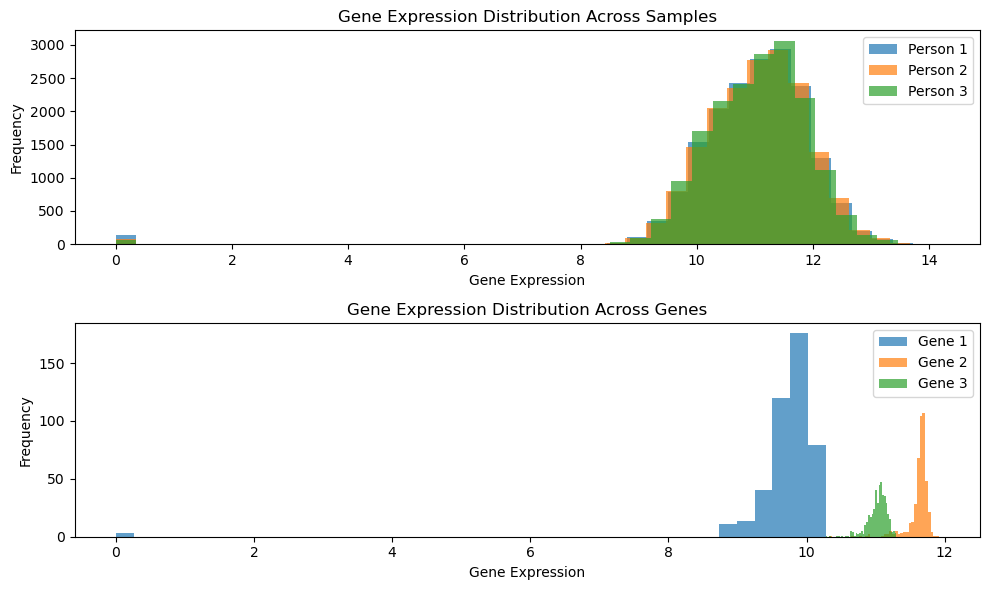

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import random
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from scipy import stats
# from matplotlib_venn import venn2
from sklearn.metrics import roc_curve, roc_auc_score






X = np.load('expression_GSE96783_series_matrix.npy')
X = np.transpose(X)

y = np.load('traits_asthma_GSE96783_series_matrix.npy')

print(len(y), len(X))

import matplotlib.pyplot as plt

# Plot histograms for the first three genes across samples
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(X[0, :], bins=40, alpha=0.7, label='Person 1')
plt.hist(X[1, :], bins=40, alpha=0.7, label='Person 2')
plt.hist(X[2, :], bins=40, alpha=0.7, label='Person 3')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')
plt.title('Gene Expression Distribution Across Samples')
plt.legend()

# Plot histograms for the first three samples across genes
plt.subplot(2, 1, 2)
plt.hist(X[:, 0], bins=40, alpha=0.7, label='Gene 1')
plt.hist(X[:, 1], bins=40, alpha=0.7, label='Gene 2')
plt.hist(X[:, 2], bins=40, alpha=0.7, label='Gene 3')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')
plt.title('Gene Expression Distribution Across Genes')
plt.legend()

plt.tight_layout()
plt.show()


def plot_reconstructions():
    reconstructed_samples = []


    batch_size = 1  # Adjust batch size as needed
    gene_count = X.shape[1]  # Number of genes in your data
    final_sequence_length = 1  # Since it's a single-dimensional sequence
    num_classes = y.shape[1]  # Number of classes in your labels
    dataset = TensorDataset(X_tensor, y_tensor)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


    with torch.no_grad():
        for batch_X, batch_y in data_loader:
    #         batch_X = batch_X.view(-1, gene_count, final_sequence_length)  # Reshape the input batch if needed
            _, _, mean, log_var = cvae(batch_X, batch_y)  # Run the CVAE model to get mean and log_var
            z = cvae.reparameterize(mean, log_var)  # Reparameterize to get latent vectors
            reconstructed_batch = cvae.decoder(z)  # Generate reconstructed data
            reconstructed_samples.append(reconstructed_batch.numpy())

    reconstructed_samples = np.concatenate(reconstructed_samples, axis=0)
    Xr = scaler.inverse_transform(reconstructed_samples)
#     print(min(np.mean(Xr, axis = 0)))
#     print("Data Min:", scaler.data_min_)
#     print("Data Max:", scaler.data_max_)
    # Visualize the original data and their reconstructions
    num_samples = min(5, len(data_loader))  # Number of samples to visualize
    sample_indices = np.random.choice(len(data_loader), num_samples, replace=False)

    # plt.figure(figsize=(10, 6))
    # for i in range(9):  # Assuming you have 3 genes for visualization
    #     plt.hist(reconstructed_samples[:, i ], bins=40, alpha=0.25, label=f'Reconstructed Gene {i + 1}')
    #     plt.hist(X[:, i ], bins=40, alpha=0.25, label=f'Original Gene {i + 1}')
    #     plt.xlabel('Gene Expression')
    #     plt.ylabel('Frequency')
    #     plt.title('Gene Expression Distribution: Original vs Reconstructed')
    #     plt.legend()
    #     plt.show()


    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

    num_genes = 9  # Total number of genes for visualization

    for i in range(num_genes):
        plt.subplot(3, 3, i + 1)  # Create a subplot
        plt.hist(Xr[:, i], bins=40, alpha=0.25, label=f'Reconstructed Gene {i + 1}', color = 'r', density = True)
        plt.hist(X[:, i], bins=40, alpha=0.25, label=f'Original Gene {i + 1}', color = 'b',  density = True)
        plt.xlabel('Gene Expression')
        plt.ylabel('Frequency')
        plt.title(f'Gene {i + 1} Expression: Original vs Reconstructed')
        plt.legend()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
    
    
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
def sample_from_ball_01(num_samples, l0, l1):

    
    latent_vectors = []
    true_labels = []

    batch_size = 1  # Adjust batch size as needed

    batch_size = 1  # Adjust batch size as needed
    gene_count = X.shape[1]  # Number of genes in your data
    final_sequence_length = 1  # Since it's a single-dimensional sequence
    num_classes = y.shape[1]  # Number of classes in your labels
    # dataset = TensorDataset(X_tensor, y_tensor)
    dataset = TensorDataset(X_tensor, y_tensor)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():
        for batch_X, batch_y in data_loader:
    #         batch_X = batch_X.view(-1, gene_count, final_sequence_length)  # Reshape the input batch if needed
            _, _, mean, log_var = cvae(batch_X, batch_y)  # Run the CVAE model to get mean and log_var
            z = cvae.reparameterize(mean, log_var)  # Reparameterize to get latent vectors
            latent_vectors.append(mean.numpy())
            true_labels.append(batch_y.argmax(dim=1).numpy())


    

    latent_vectors = np.concatenate(latent_vectors, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(latent_vectors)
    plt.figure(figsize=(12, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c = true_labels, cmap='jet', alpha=0.25)
    plt.colorbar()
#     plt.scatter(pca_interpolated[:, 0], pca_interpolated[:, 1], c=colors, marker='o', alpha=.5)
    plt.title('PCA Visualization with Interpolation Path')
    plt.show()
    
    z0, z1 = latent_vectors[true_labels == l0], latent_vectors[true_labels == l1]
    

    # Assuming you have cluster points z0 and z1 as numpy arrays
    # You can choose the bandwidth parameter (adjust as needed)
    bandwidth = 0.2

    # Create a KernelDensity estimator for cluster z0
    kde_z0 = KernelDensity(bandwidth=bandwidth)
    kde_z0.fit(z0)

    # Create a KernelDensity estimator for cluster z1
    kde_z1 = KernelDensity(bandwidth=bandwidth)
    kde_z1.fit(z1)

    # Number of samples to draw from each cluster
    n_samples = 100

    # Draw n_samples from cluster z0
    samples_z0 = kde_z0.sample(num_samples)
    samples_z0 = np.array(samples_z0)

    # Draw n_samples from cluster z1
    samples_z1 = kde_z1.sample(num_samples)
    samples_z1 = np.array(samples_z1)
    samples_points = np.concatenate((samples_z0, samples_z1))
    
    pca = PCA(n_components=2)
    z_2d =  pca.fit_transform(samples_points)
    plt.figure(figsize=(12, 6))
    # Visualize the sampled points (adjust as needed)
    true_labels = np.concatenate((np.ones(num_samples),np.zeros(num_samples)))
    plt.scatter(z_2d[:, 0], z_2d[:, 1], c = true_labels, cmap='jet', alpha=0.25)
    plt.colorbar()
    plt.title('PCA from Cluster sampling')
    plt.xlabel('Latent Space Dimension 1')
    plt.ylabel('Latent Space Dimension 2')
    plt.show()




    samples_z0 = torch.tensor(samples_z0, dtype=torch.float32)
    samples_z1 = torch.tensor(samples_z1, dtype=torch.float32)
    
    # Sample points around label0 centroid
    X0_reconstructed, X1_reconstructed = [],[]
    for i in range(num_samples):
        X0_reconstructed.append(cvae.decoder(samples_z0[i]).detach().numpy())
        X1_reconstructed.append(cvae.decoder(samples_z1[i]).detach().numpy())

        
    sampled_points_label0, sampled_points_label1 = np.asarray(samples_z0), np.asarray(samples_z1)
    true_labels = np.concatenate((np.zeros(num_samples),np.ones(num_samples)))
    X0_reconstructed, X1_reconstructed = np.asarray(X0_reconstructed), np.asarray(X1_reconstructed)
    samples_points = np.concatenate((sampled_points_label0, sampled_points_label1))
#     umap = UMAP(n_components=2)
#     umap_result = umap.fit_transform(samples_points)

# Apply PCA for dimensionality reduction

    
    
#     concatenated_array = np.concatenate((array1, array2))
    
    return X0_reconstructed, X1_reconstructed
# sampled_points_label1 = np.array(sampled_points_label1)

# Now you have sampled points around each centroid within the specified ball radius
# l0, l1 = 0,1
# ylabels = np.zeros(len(y))
# for i in range(len(y)):
#     ylabels[i] = y[i].argmax()
# X0 = X[ylabels == l0]
# X1 = X[ylabels == l1]
# num_genes = X.shape[1]
# num_samples = 1*10**3
# sigma_factor = 10.

#     # samples latent space points around the label0 and 1 centroids and reconstructs (decodes) each point with cvae
# X0_reconstructed, X1_reconstructed = sample_from_ball_01(num_samples,l0,l1)



Data Min: [ 0.         10.32654055 10.27520566 ...  0.          8.82232595
  0.        ]
Data Max: [10.27560801 11.91567349 11.29999107 ... 12.37464506 10.24941015
  9.8758835 ]
X_train shape: (354, 17726)
X_test shape: (89, 17726)
y_train shape: (354, 2)
y_test shape: (89, 2)


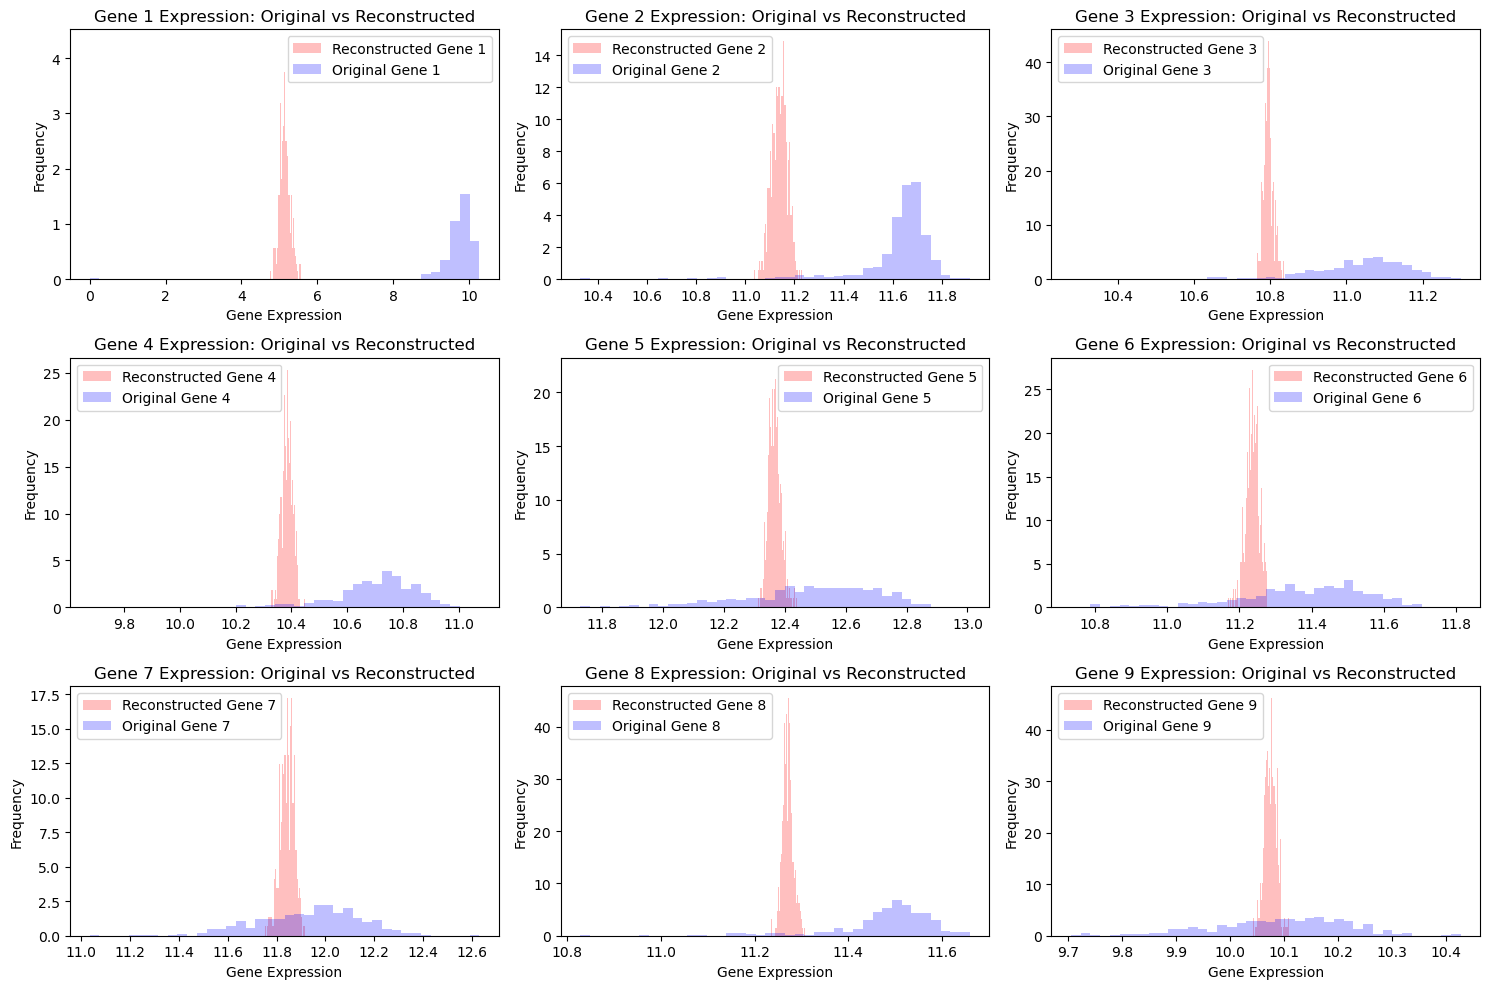

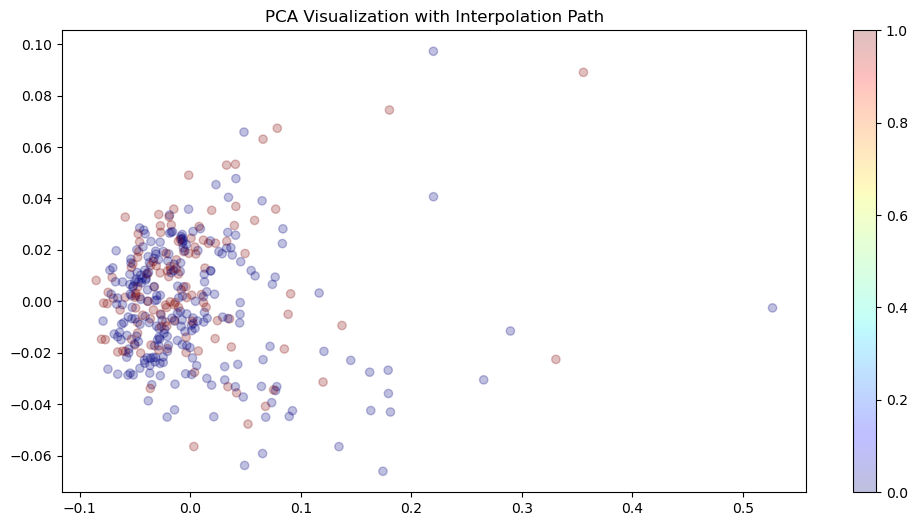

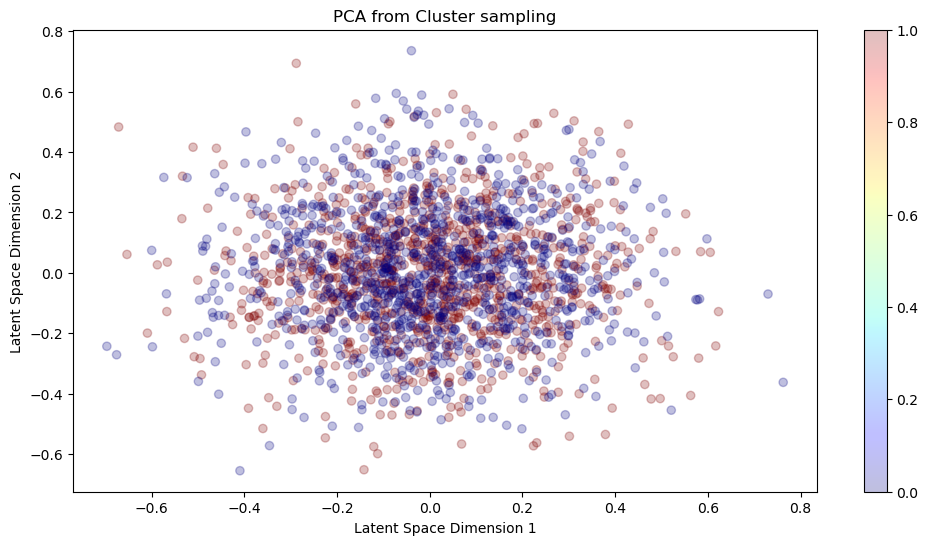

Epoch [1/1000], Recon : 0.0839, KL : 1.8603, Ortho : 127.5036, Class: 0.7150, Accuracy: 59.60%
Epoch [2/1000], Recon : 0.0831, KL : 3.0360, Ortho : 161.1592, Class: 0.8053, Accuracy: 57.63%
Epoch [3/1000], Recon : 0.0788, KL : 3.9933, Ortho : 223.0222, Class: 0.7965, Accuracy: 51.13%
Epoch [4/1000], Recon : 0.0727, KL : 10.4120, Ortho : 689.3145, Class: 0.6912, Accuracy: 64.12%
Epoch [5/1000], Recon : 0.0607, KL : 27.5104, Ortho : 2105.9966, Class: 0.7335, Accuracy: 61.30%
Epoch [6/1000], Recon : 0.0460, KL : 53.5437, Ortho : 4506.5229, Class: 0.7269, Accuracy: 61.86%
Epoch [7/1000], Recon : 0.0355, KL : 54.9335, Ortho : 4941.6769, Class: 0.6673, Accuracy: 58.19%
Epoch [8/1000], Recon : 0.0283, KL : 46.1800, Ortho : 4203.7466, Class: 0.6565, Accuracy: 62.43%
Epoch [9/1000], Recon : 0.0250, KL : 42.5343, Ortho : 3880.8082, Class: 0.6565, Accuracy: 57.63%
Epoch [10/1000], Recon : 0.0230, KL : 37.7229, Ortho : 3425.1747, Class: 0.6333, Accuracy: 63.84%
Epoch [11/1000], Recon : 0.0215, KL 

Epoch [87/1000], Recon : 0.0162, KL : 13.6177, Ortho : 474.1515, Class: 0.6083, Accuracy: 67.80%
Epoch [88/1000], Recon : 0.0158, KL : 13.0726, Ortho : 396.2978, Class: 0.5608, Accuracy: 72.03%
Epoch [89/1000], Recon : 0.0163, KL : 13.4780, Ortho : 417.6970, Class: 0.5510, Accuracy: 74.01%
Epoch [90/1000], Recon : 0.0160, KL : 13.1641, Ortho : 422.5084, Class: 0.5629, Accuracy: 69.49%
Epoch [91/1000], Recon : 0.0172, KL : 13.4286, Ortho : 454.9801, Class: 0.5762, Accuracy: 69.49%
Epoch [92/1000], Recon : 0.0164, KL : 12.4872, Ortho : 370.4435, Class: 0.5240, Accuracy: 74.58%
Epoch [93/1000], Recon : 0.0161, KL : 13.2291, Ortho : 423.8505, Class: 0.5141, Accuracy: 72.03%
Epoch [94/1000], Recon : 0.0154, KL : 12.9314, Ortho : 415.6829, Class: 0.5520, Accuracy: 70.90%
Epoch [95/1000], Recon : 0.0162, KL : 12.4461, Ortho : 394.0545, Class: 0.5547, Accuracy: 68.64%
Epoch [96/1000], Recon : 0.0157, KL : 13.1238, Ortho : 438.2834, Class: 0.5576, Accuracy: 70.06%
Epoch [97/1000], Recon : 0.015

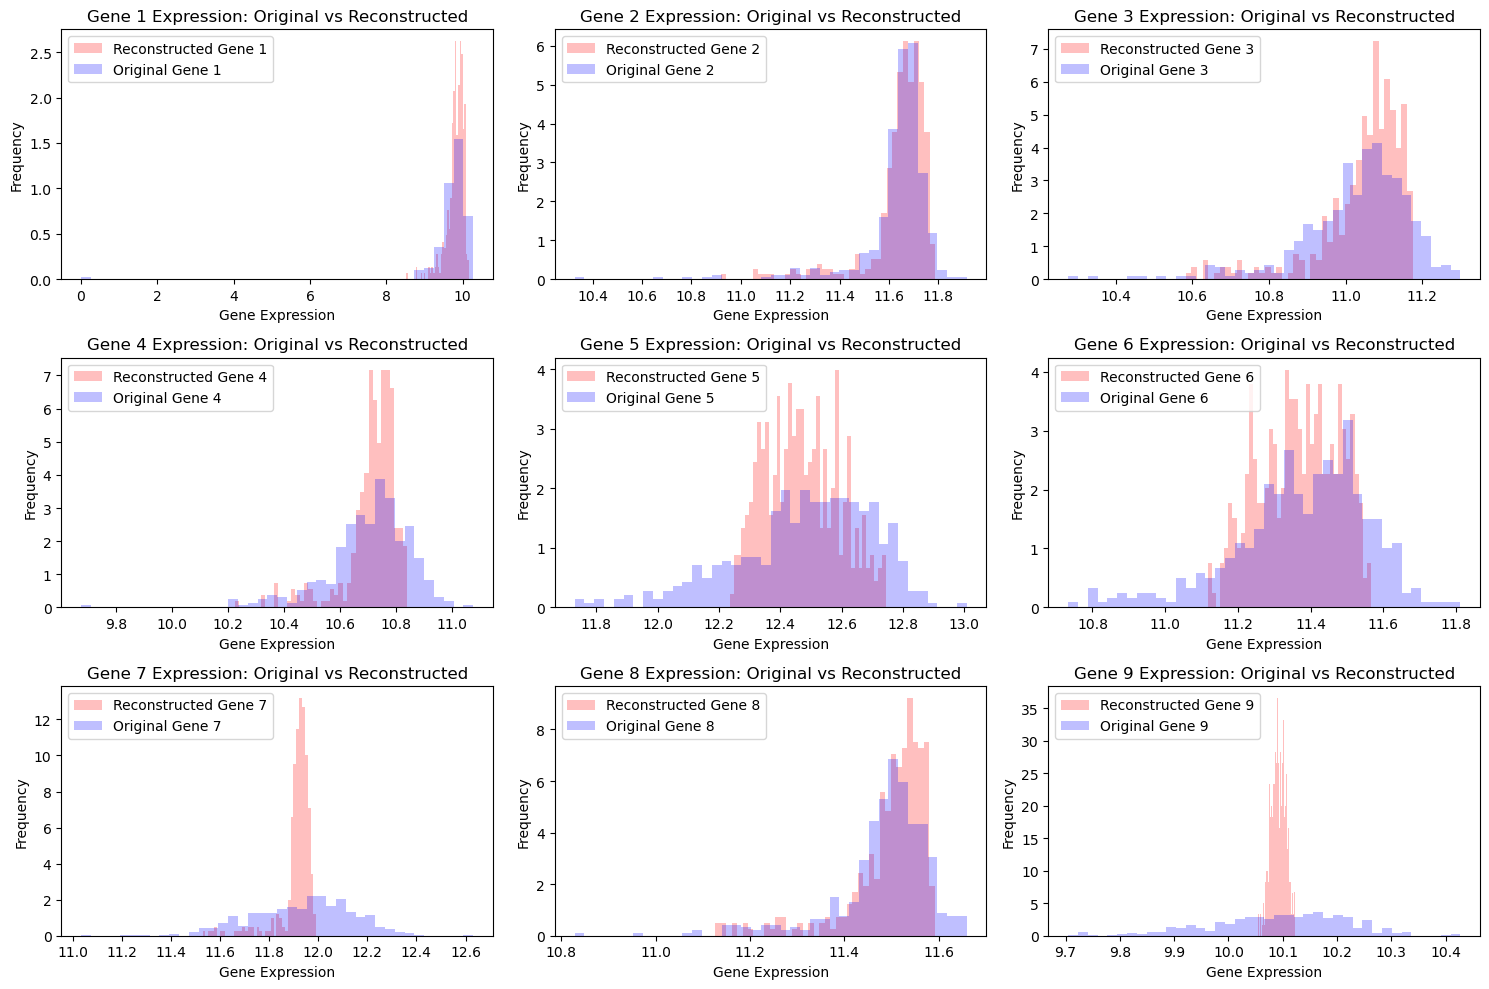

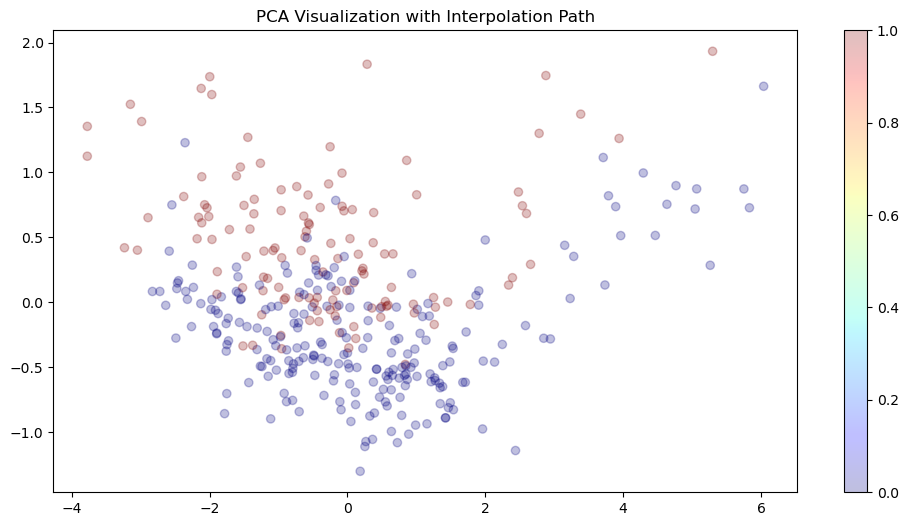

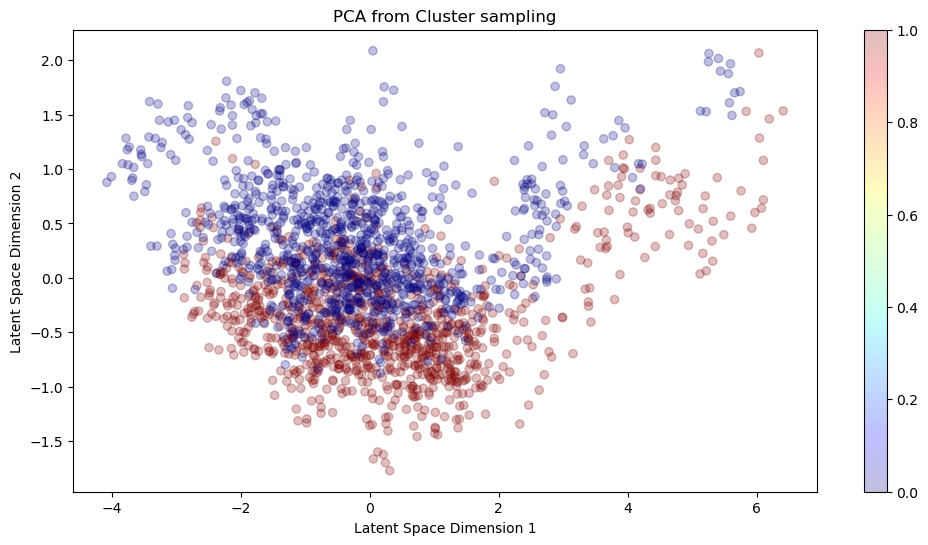

Epoch [101/1000], Recon : 0.0153, KL : 13.0020, Ortho : 374.1094, Class: 0.5070, Accuracy: 75.99%
Epoch [102/1000], Recon : 0.0151, KL : 13.4441, Ortho : 402.9688, Class: 0.5238, Accuracy: 74.29%
Epoch [103/1000], Recon : 0.0156, KL : 13.3250, Ortho : 393.2179, Class: 0.5160, Accuracy: 75.42%
Epoch [104/1000], Recon : 0.0159, KL : 13.0289, Ortho : 380.3672, Class: 0.5381, Accuracy: 72.32%
Epoch [105/1000], Recon : 0.0156, KL : 12.9171, Ortho : 370.2347, Class: 0.5341, Accuracy: 74.86%
Epoch [106/1000], Recon : 0.0158, KL : 12.9467, Ortho : 376.3655, Class: 0.4981, Accuracy: 76.27%
Epoch [107/1000], Recon : 0.0152, KL : 12.8164, Ortho : 358.9596, Class: 0.4801, Accuracy: 76.55%
Epoch [108/1000], Recon : 0.0154, KL : 13.0361, Ortho : 391.9506, Class: 0.4845, Accuracy: 75.42%
Epoch [109/1000], Recon : 0.0153, KL : 13.0118, Ortho : 383.6749, Class: 0.4916, Accuracy: 78.81%
Epoch [110/1000], Recon : 0.0157, KL : 12.6267, Ortho : 345.9679, Class: 0.4860, Accuracy: 77.12%
Epoch [111/1000], Re

Epoch [185/1000], Recon : 0.0137, KL : 14.1946, Ortho : 406.6046, Class: 0.2959, Accuracy: 87.85%
Epoch [186/1000], Recon : 0.0135, KL : 16.2068, Ortho : 619.8086, Class: 0.5373, Accuracy: 77.97%
Epoch [187/1000], Recon : 0.0134, KL : 13.8575, Ortho : 384.5212, Class: 0.2394, Accuracy: 92.09%
Epoch [188/1000], Recon : 0.0137, KL : 13.7987, Ortho : 355.5315, Class: 0.1974, Accuracy: 95.76%
Epoch [189/1000], Recon : 0.0140, KL : 13.9720, Ortho : 347.4852, Class: 0.1721, Accuracy: 97.18%
Epoch [190/1000], Recon : 0.0134, KL : 14.2230, Ortho : 362.0629, Class: 0.1871, Accuracy: 96.33%
Epoch [191/1000], Recon : 0.0133, KL : 14.2884, Ortho : 359.0223, Class: 0.2055, Accuracy: 96.61%
Epoch [192/1000], Recon : 0.0139, KL : 14.6099, Ortho : 381.7764, Class: 0.2122, Accuracy: 91.24%
Epoch [193/1000], Recon : 0.0137, KL : 14.8103, Ortho : 407.3883, Class: 0.2200, Accuracy: 94.07%
Epoch [194/1000], Recon : 0.0132, KL : 14.5748, Ortho : 375.2441, Class: 0.1815, Accuracy: 95.20%
Epoch [195/1000], Re

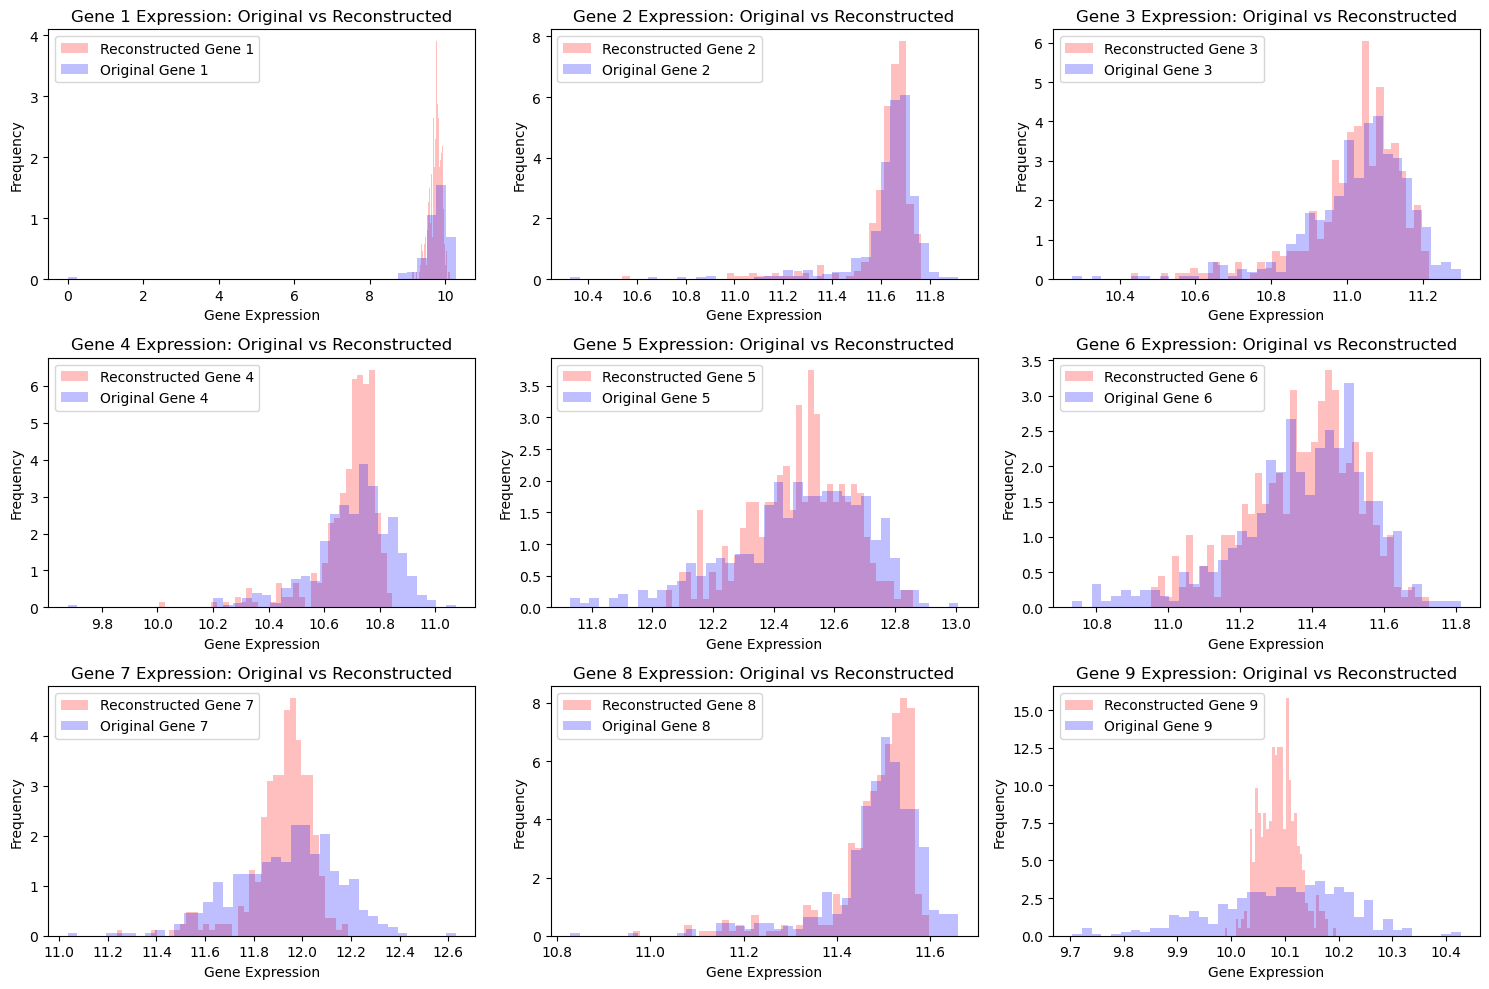

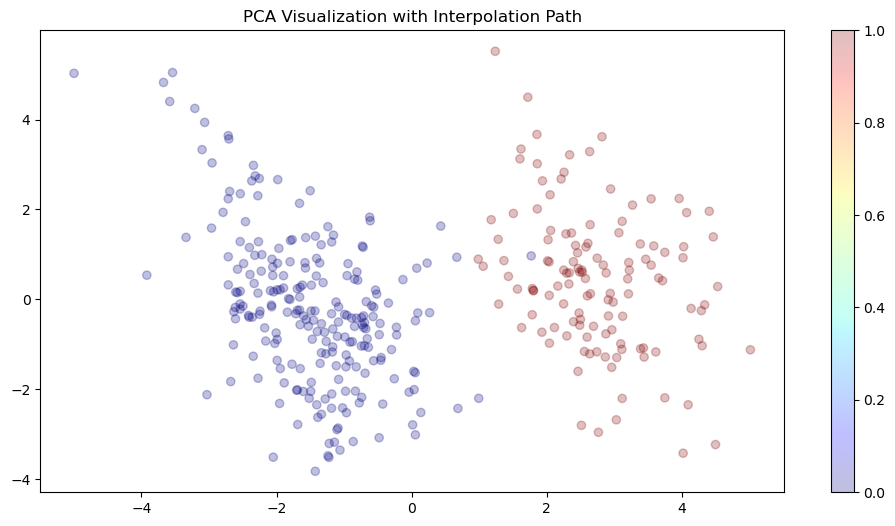

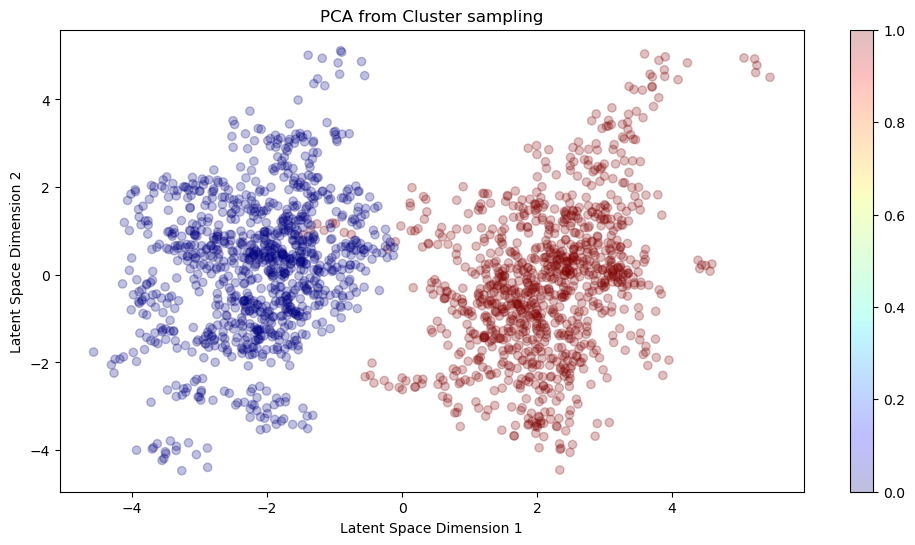

Epoch [201/1000], Recon : 0.0135, KL : 14.3442, Ortho : 357.1949, Class: 0.1324, Accuracy: 98.59%
Epoch [202/1000], Recon : 0.0132, KL : 14.3856, Ortho : 363.6477, Class: 0.1323, Accuracy: 98.31%
Epoch [203/1000], Recon : 0.0131, KL : 14.5841, Ortho : 372.6608, Class: 0.1428, Accuracy: 97.74%
Epoch [204/1000], Recon : 0.0133, KL : 14.4094, Ortho : 366.0596, Class: 0.1279, Accuracy: 99.15%
Epoch [205/1000], Recon : 0.0147, KL : 14.5059, Ortho : 375.4726, Class: 0.1289, Accuracy: 99.44%
Epoch [206/1000], Recon : 0.0130, KL : 14.3746, Ortho : 369.1714, Class: 0.1463, Accuracy: 99.15%
Epoch [207/1000], Recon : 0.0136, KL : 14.8422, Ortho : 411.9876, Class: 0.1888, Accuracy: 95.20%
Epoch [208/1000], Recon : 0.0132, KL : 14.9807, Ortho : 406.8926, Class: 0.1389, Accuracy: 97.18%
Epoch [209/1000], Recon : 0.0129, KL : 15.0263, Ortho : 408.2399, Class: 0.1439, Accuracy: 98.31%
Epoch [210/1000], Recon : 0.0133, KL : 15.1095, Ortho : 419.6167, Class: 0.1247, Accuracy: 98.02%
Epoch [211/1000], Re

Epoch [285/1000], Recon : 0.0140, KL : 15.5502, Ortho : 560.8337, Class: 0.0314, Accuracy: 100.00%
Epoch [286/1000], Recon : 0.0130, KL : 15.7171, Ortho : 584.1746, Class: 0.0305, Accuracy: 100.00%
Epoch [287/1000], Recon : 0.0128, KL : 15.3888, Ortho : 538.7543, Class: 0.0349, Accuracy: 99.72%
Epoch [288/1000], Recon : 0.0129, KL : 15.6835, Ortho : 563.9174, Class: 0.0352, Accuracy: 99.72%
Epoch [289/1000], Recon : 0.0134, KL : 15.6937, Ortho : 566.8109, Class: 0.0405, Accuracy: 100.00%
Epoch [290/1000], Recon : 0.0133, KL : 15.4812, Ortho : 546.4090, Class: 0.0268, Accuracy: 100.00%
Epoch [291/1000], Recon : 0.0126, KL : 15.5775, Ortho : 558.8354, Class: 0.0458, Accuracy: 100.00%
Epoch [292/1000], Recon : 0.0134, KL : 15.9164, Ortho : 581.2040, Class: 0.0574, Accuracy: 99.72%
Epoch [293/1000], Recon : 0.0125, KL : 15.6789, Ortho : 551.5516, Class: 0.0423, Accuracy: 99.44%
Epoch [294/1000], Recon : 0.0129, KL : 16.0339, Ortho : 566.9304, Class: 0.0348, Accuracy: 100.00%
Epoch [295/100

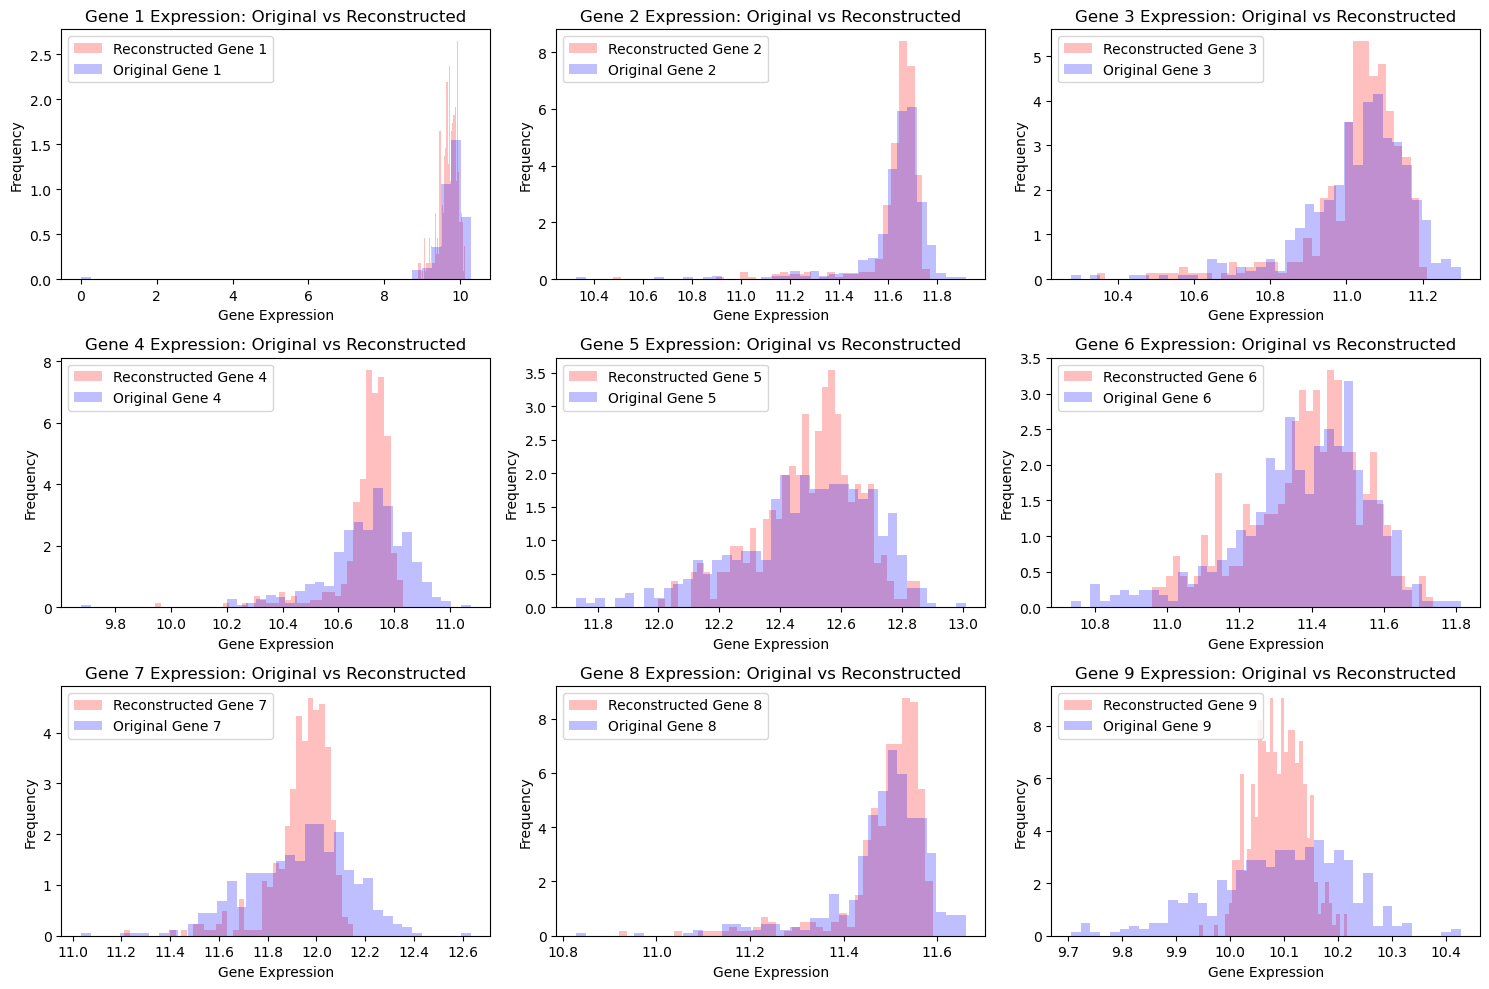

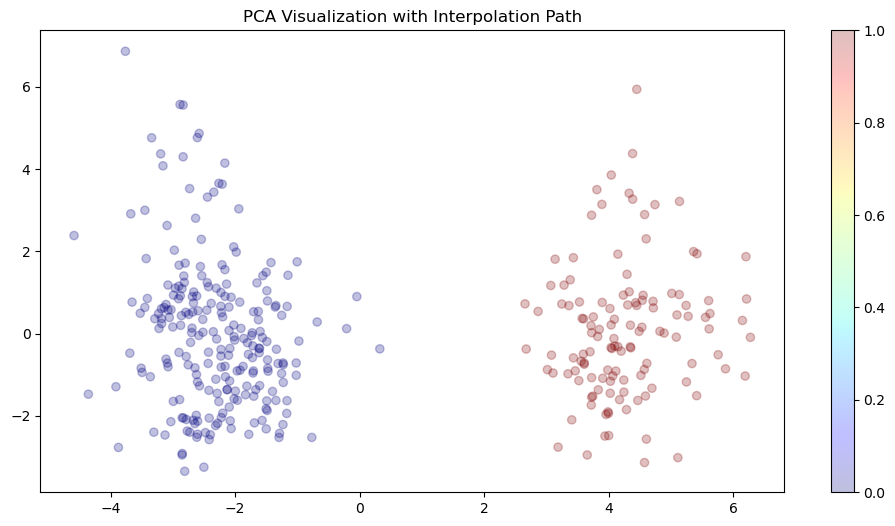

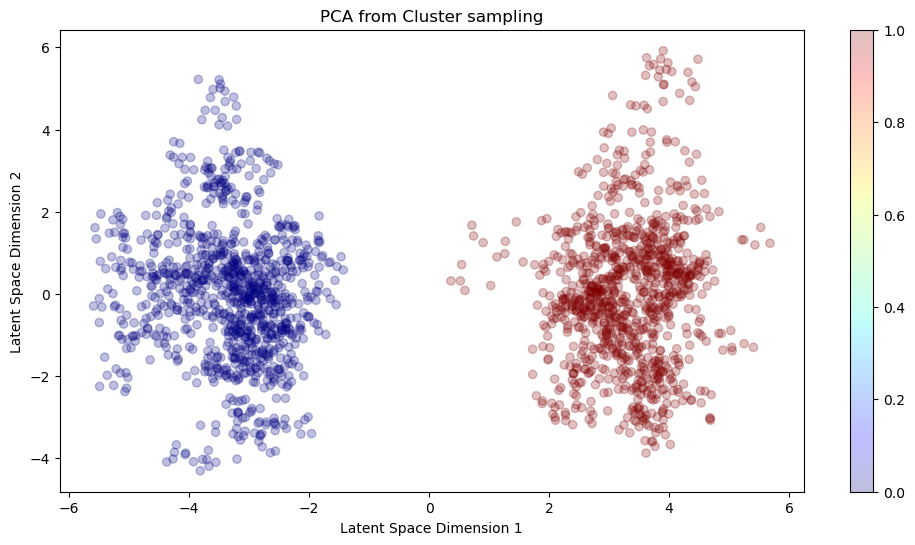

Epoch [301/1000], Recon : 0.0130, KL : 15.5859, Ortho : 561.7446, Class: 0.0253, Accuracy: 100.00%
Epoch [302/1000], Recon : 0.0127, KL : 15.5610, Ortho : 567.0676, Class: 0.0294, Accuracy: 100.00%
Epoch [303/1000], Recon : 0.0129, KL : 15.5663, Ortho : 564.9180, Class: 0.0277, Accuracy: 100.00%
Epoch [304/1000], Recon : 0.0128, KL : 15.5076, Ortho : 568.5300, Class: 0.0320, Accuracy: 100.00%
Epoch [305/1000], Recon : 0.0125, KL : 15.6927, Ortho : 586.2707, Class: 0.0344, Accuracy: 100.00%
Epoch [306/1000], Recon : 0.0129, KL : 16.0042, Ortho : 627.0346, Class: 0.0607, Accuracy: 98.87%
Epoch [307/1000], Recon : 0.0127, KL : 15.8161, Ortho : 603.6569, Class: 0.0406, Accuracy: 99.72%
Epoch [308/1000], Recon : 0.0130, KL : 15.2740, Ortho : 554.0476, Class: 0.0289, Accuracy: 100.00%
Epoch [309/1000], Recon : 0.0130, KL : 15.2891, Ortho : 562.8549, Class: 0.0227, Accuracy: 100.00%
Epoch [310/1000], Recon : 0.0129, KL : 15.3457, Ortho : 570.5828, Class: 0.0216, Accuracy: 100.00%
Epoch [311/1

Epoch [385/1000], Recon : 0.0127, KL : 15.6819, Ortho : 585.3033, Class: 0.0132, Accuracy: 100.00%
Epoch [386/1000], Recon : 0.0124, KL : 15.9531, Ortho : 616.6142, Class: 0.0181, Accuracy: 100.00%
Epoch [387/1000], Recon : 0.0129, KL : 16.1210, Ortho : 613.5660, Class: 0.0155, Accuracy: 100.00%
Epoch [388/1000], Recon : 0.0124, KL : 16.0511, Ortho : 622.1526, Class: 0.0186, Accuracy: 100.00%
Epoch [389/1000], Recon : 0.0126, KL : 15.8947, Ortho : 603.8351, Class: 0.0203, Accuracy: 100.00%
Epoch [390/1000], Recon : 0.0120, KL : 15.7902, Ortho : 591.9118, Class: 0.0151, Accuracy: 100.00%
Epoch [391/1000], Recon : 0.0123, KL : 15.6682, Ortho : 576.3935, Class: 0.0124, Accuracy: 100.00%
Epoch [392/1000], Recon : 0.0127, KL : 15.6703, Ortho : 584.6803, Class: 0.0133, Accuracy: 100.00%
Epoch [393/1000], Recon : 0.0124, KL : 15.5358, Ortho : 582.1646, Class: 0.0148, Accuracy: 100.00%
Epoch [394/1000], Recon : 0.0124, KL : 15.5510, Ortho : 587.9148, Class: 0.0111, Accuracy: 100.00%
Epoch [395

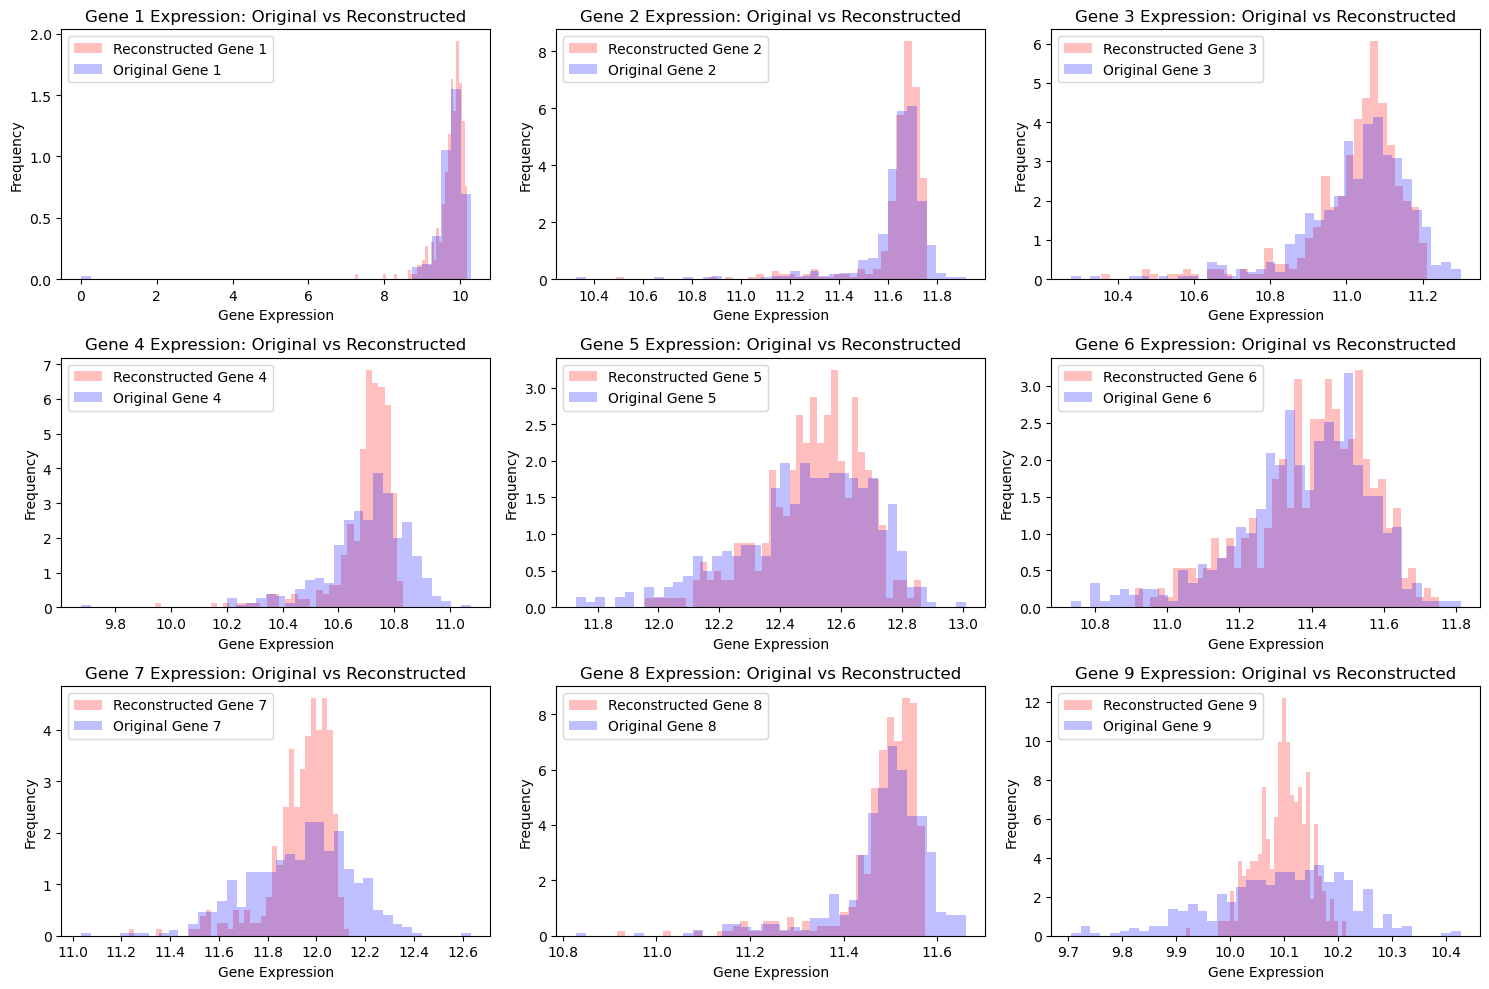

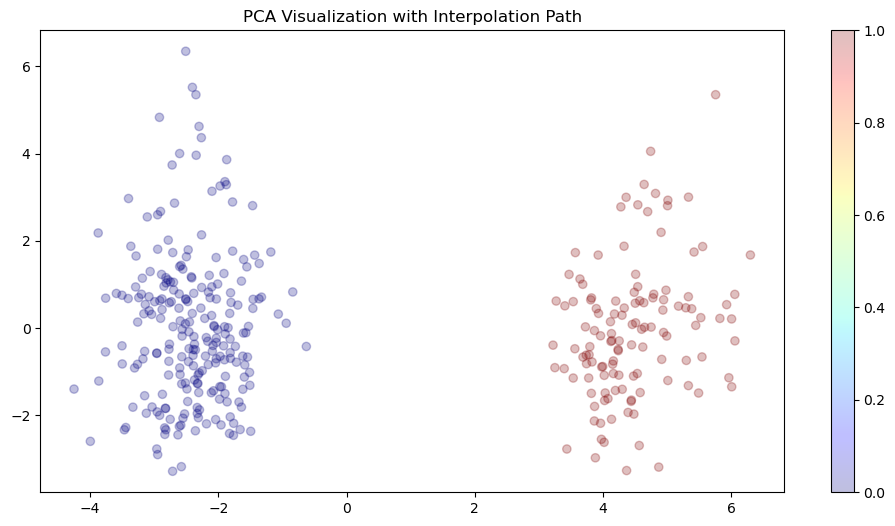

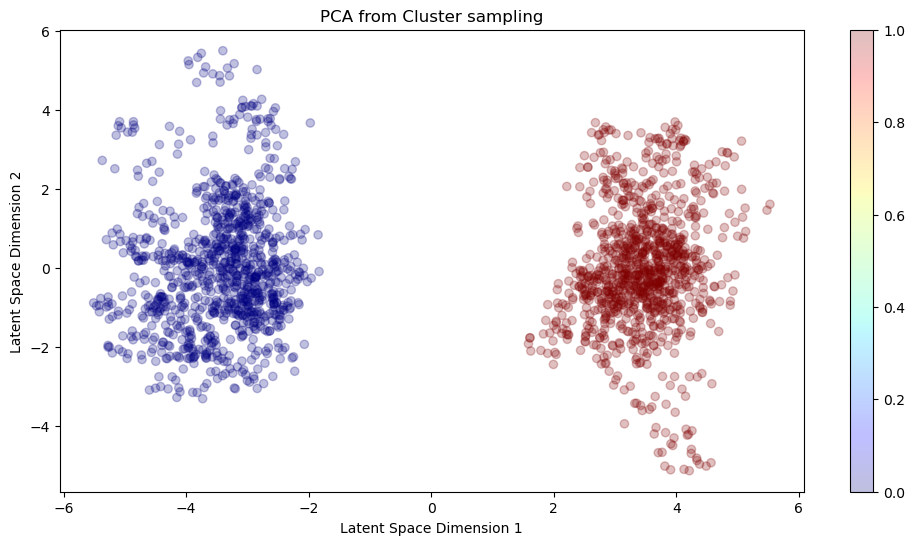

Epoch [401/1000], Recon : 0.0126, KL : 15.8931, Ortho : 595.5192, Class: 0.0157, Accuracy: 100.00%
Epoch [402/1000], Recon : 0.0120, KL : 16.2493, Ortho : 623.4859, Class: 0.0184, Accuracy: 100.00%
Epoch [403/1000], Recon : 0.0126, KL : 16.1072, Ortho : 624.9904, Class: 0.0251, Accuracy: 100.00%
Epoch [404/1000], Recon : 0.0121, KL : 16.0402, Ortho : 624.5759, Class: 0.0199, Accuracy: 100.00%
Epoch [405/1000], Recon : 0.0121, KL : 15.8874, Ortho : 595.2307, Class: 0.0140, Accuracy: 100.00%
Epoch [406/1000], Recon : 0.0119, KL : 15.7447, Ortho : 577.7525, Class: 0.0120, Accuracy: 100.00%
Epoch [407/1000], Recon : 0.0123, KL : 15.8924, Ortho : 584.1786, Class: 0.0125, Accuracy: 100.00%
Epoch [408/1000], Recon : 0.0121, KL : 15.8938, Ortho : 586.5207, Class: 0.0115, Accuracy: 100.00%
Epoch [409/1000], Recon : 0.0123, KL : 15.8645, Ortho : 592.2381, Class: 0.0139, Accuracy: 100.00%
Epoch [410/1000], Recon : 0.0124, KL : 15.9290, Ortho : 601.1504, Class: 0.0151, Accuracy: 100.00%
Epoch [411

Epoch [485/1000], Recon : 0.0111, KL : 15.9942, Ortho : 549.1644, Class: 0.0120, Accuracy: 100.00%
Epoch [486/1000], Recon : 0.0110, KL : 16.2389, Ortho : 565.8129, Class: 0.0107, Accuracy: 100.00%
Epoch [487/1000], Recon : 0.0115, KL : 16.2214, Ortho : 571.0536, Class: 0.0102, Accuracy: 100.00%
Epoch [488/1000], Recon : 0.0112, KL : 16.5309, Ortho : 600.3996, Class: 0.0174, Accuracy: 100.00%
Epoch [489/1000], Recon : 0.0115, KL : 16.3034, Ortho : 573.2069, Class: 0.0109, Accuracy: 100.00%
Epoch [490/1000], Recon : 0.0111, KL : 15.9384, Ortho : 551.1783, Class: 0.0111, Accuracy: 100.00%
Epoch [491/1000], Recon : 0.0114, KL : 15.9008, Ortho : 553.6166, Class: 0.0118, Accuracy: 100.00%
Epoch [492/1000], Recon : 0.0114, KL : 16.0636, Ortho : 548.7622, Class: 0.0116, Accuracy: 100.00%
Epoch [493/1000], Recon : 0.0110, KL : 16.2992, Ortho : 551.0478, Class: 0.0103, Accuracy: 100.00%
Epoch [494/1000], Recon : 0.0113, KL : 16.3899, Ortho : 563.8530, Class: 0.0106, Accuracy: 100.00%
Epoch [495

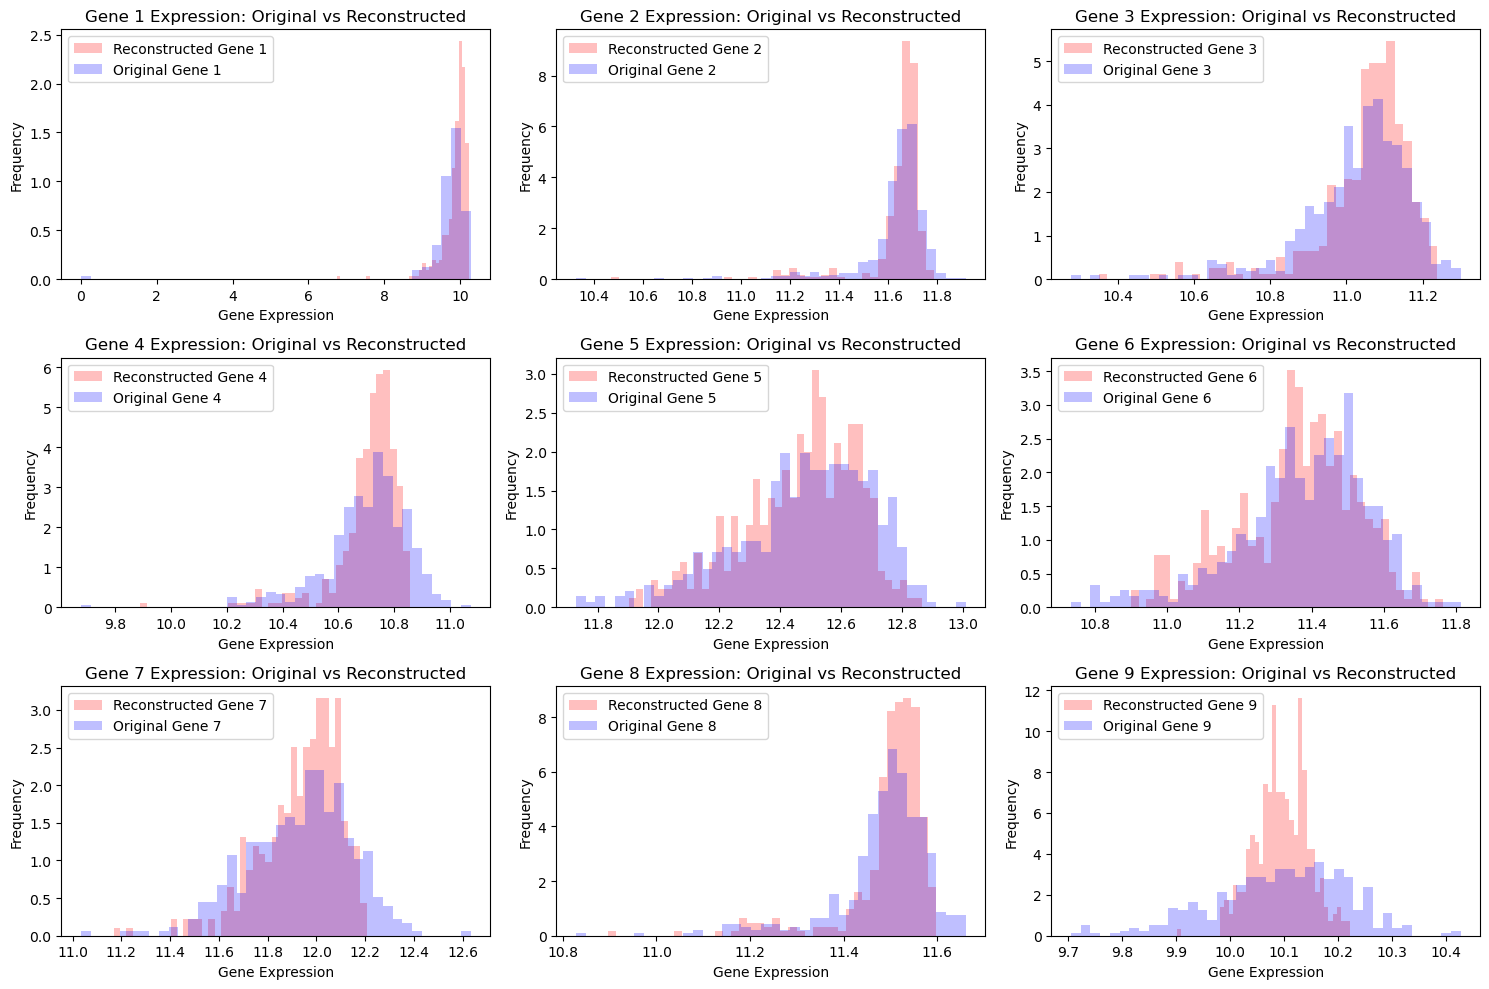

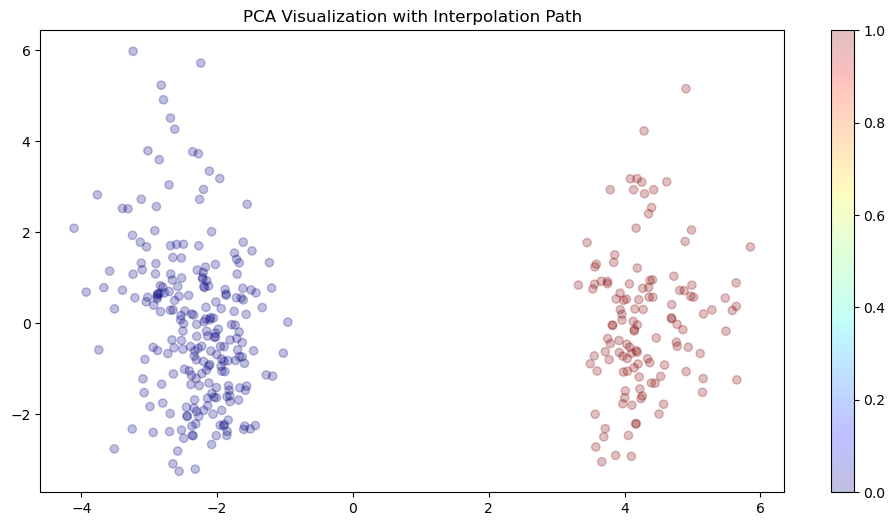

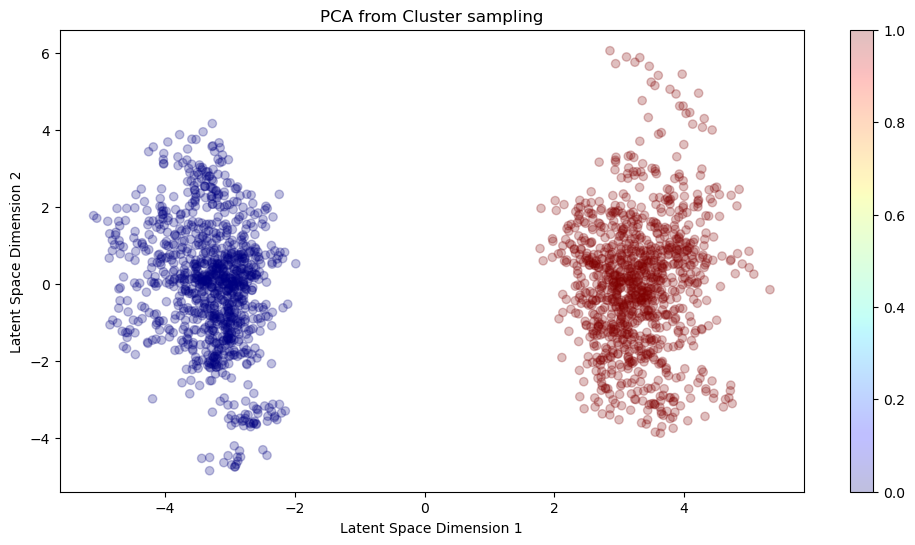

Epoch [501/1000], Recon : 0.0112, KL : 16.0018, Ortho : 546.4669, Class: 0.0090, Accuracy: 100.00%
Epoch [502/1000], Recon : 0.0111, KL : 16.0021, Ortho : 535.4255, Class: 0.0093, Accuracy: 100.00%
Epoch [503/1000], Recon : 0.0112, KL : 16.1452, Ortho : 557.1228, Class: 0.0096, Accuracy: 100.00%
Epoch [504/1000], Recon : 0.0114, KL : 16.2060, Ortho : 552.2686, Class: 0.0091, Accuracy: 100.00%
Epoch [505/1000], Recon : 0.0111, KL : 16.0237, Ortho : 534.8284, Class: 0.0108, Accuracy: 100.00%
Epoch [506/1000], Recon : 0.0111, KL : 16.1907, Ortho : 543.8731, Class: 0.0117, Accuracy: 100.00%
Epoch [507/1000], Recon : 0.0111, KL : 16.2344, Ortho : 552.9384, Class: 0.0090, Accuracy: 100.00%
Epoch [508/1000], Recon : 0.0110, KL : 16.0879, Ortho : 544.2654, Class: 0.0093, Accuracy: 100.00%
Epoch [509/1000], Recon : 0.0111, KL : 16.2113, Ortho : 552.6737, Class: 0.0094, Accuracy: 100.00%
Epoch [510/1000], Recon : 0.0109, KL : 16.0764, Ortho : 546.0745, Class: 0.0090, Accuracy: 100.00%
Epoch [511

Epoch [585/1000], Recon : 0.0109, KL : 15.0079, Ortho : 412.1685, Class: 0.0264, Accuracy: 100.00%
Epoch [586/1000], Recon : 0.0111, KL : 15.3181, Ortho : 425.8734, Class: 0.0329, Accuracy: 100.00%
Epoch [587/1000], Recon : 0.0107, KL : 15.6658, Ortho : 442.3257, Class: 0.0213, Accuracy: 100.00%
Epoch [588/1000], Recon : 0.0108, KL : 15.5374, Ortho : 417.7596, Class: 0.0186, Accuracy: 100.00%
Epoch [589/1000], Recon : 0.0108, KL : 15.4754, Ortho : 412.3691, Class: 0.0196, Accuracy: 100.00%
Epoch [590/1000], Recon : 0.0106, KL : 15.4834, Ortho : 415.6698, Class: 0.0153, Accuracy: 100.00%
Epoch [591/1000], Recon : 0.0107, KL : 15.3496, Ortho : 414.6103, Class: 0.0162, Accuracy: 100.00%
Epoch [592/1000], Recon : 0.0109, KL : 15.3013, Ortho : 412.6245, Class: 0.0160, Accuracy: 100.00%
Epoch [593/1000], Recon : 0.0106, KL : 15.2472, Ortho : 408.6297, Class: 0.0170, Accuracy: 100.00%
Epoch [594/1000], Recon : 0.0109, KL : 15.3616, Ortho : 414.6752, Class: 0.0149, Accuracy: 100.00%
Epoch [595

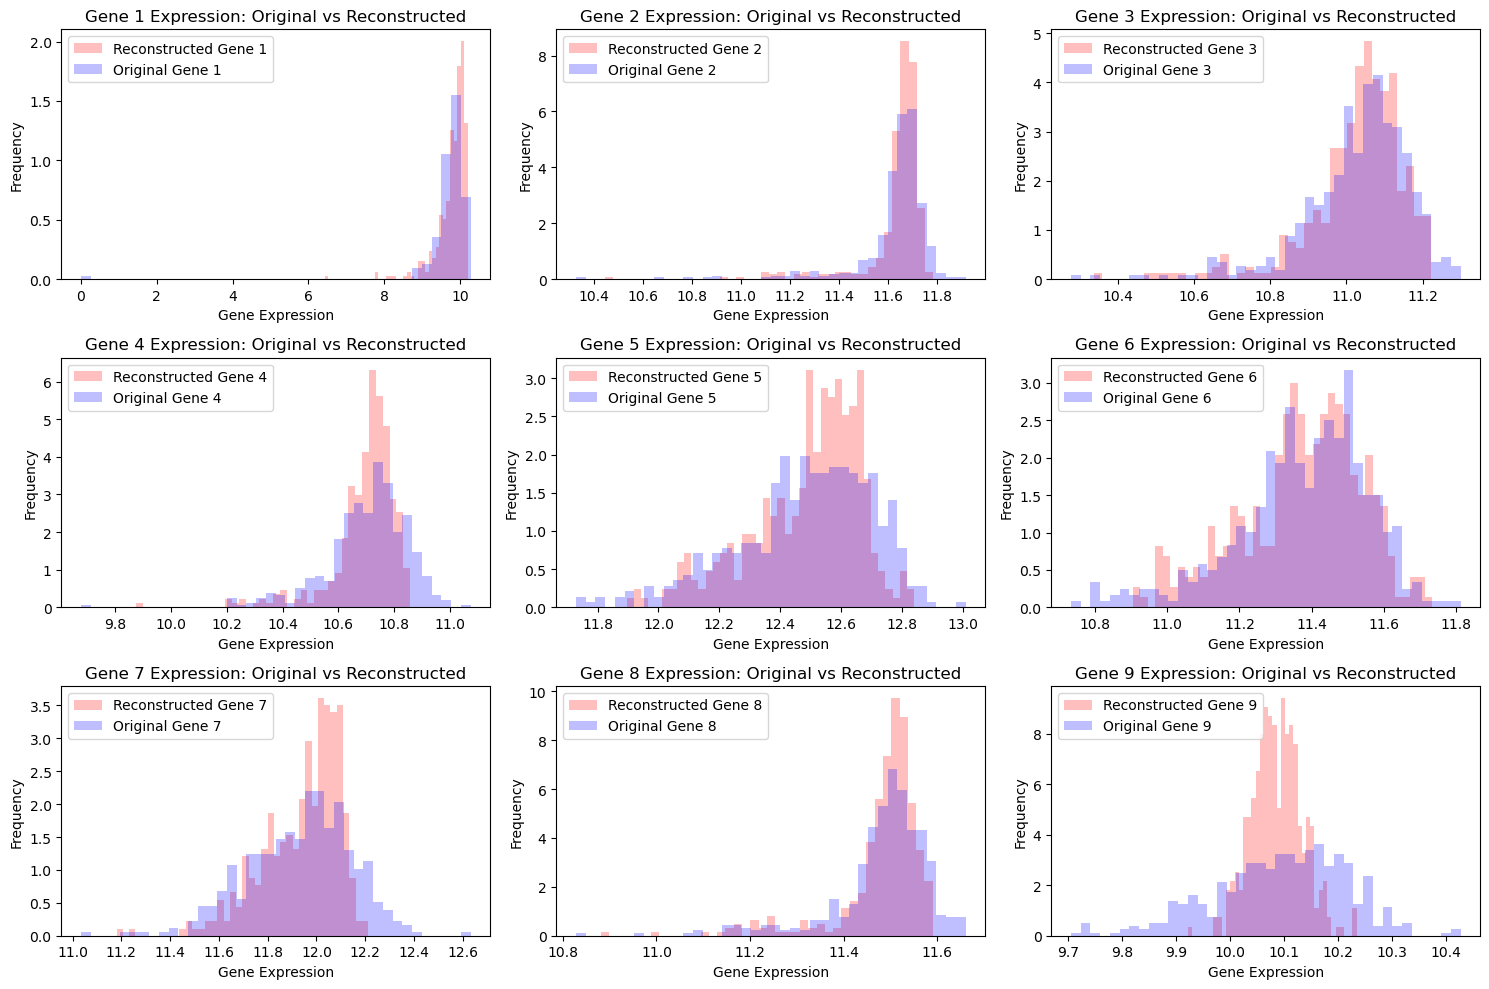

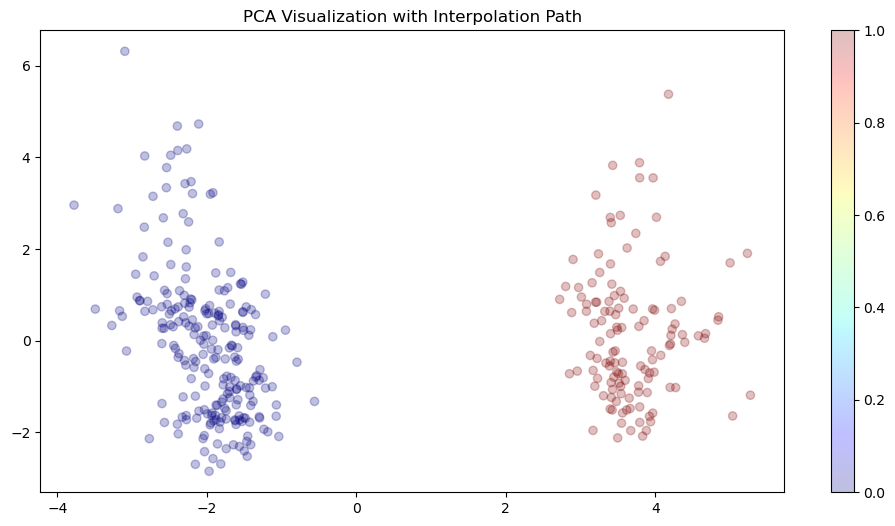

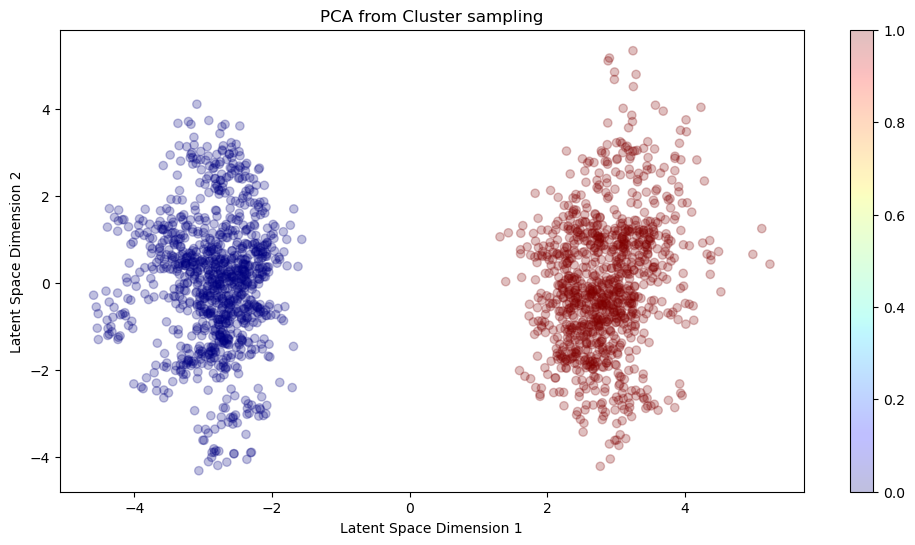

Epoch [601/1000], Recon : 0.0108, KL : 15.5353, Ortho : 425.4932, Class: 0.0159, Accuracy: 100.00%
Epoch [602/1000], Recon : 0.0109, KL : 15.7177, Ortho : 431.8963, Class: 0.0137, Accuracy: 100.00%
Epoch [603/1000], Recon : 0.0110, KL : 15.7967, Ortho : 432.0706, Class: 0.0144, Accuracy: 100.00%
Epoch [604/1000], Recon : 0.0104, KL : 15.9003, Ortho : 433.1849, Class: 0.0142, Accuracy: 100.00%
Epoch [605/1000], Recon : 0.0107, KL : 15.7930, Ortho : 434.9419, Class: 0.0132, Accuracy: 100.00%
Epoch [606/1000], Recon : 0.0105, KL : 15.6412, Ortho : 430.2059, Class: 0.0131, Accuracy: 100.00%
Epoch [607/1000], Recon : 0.0112, KL : 15.5449, Ortho : 434.0135, Class: 0.0129, Accuracy: 100.00%
Epoch [608/1000], Recon : 0.0110, KL : 15.5876, Ortho : 436.2594, Class: 0.0139, Accuracy: 100.00%
Epoch [609/1000], Recon : 0.0105, KL : 15.7763, Ortho : 446.4841, Class: 0.0155, Accuracy: 100.00%
Epoch [610/1000], Recon : 0.0108, KL : 15.9036, Ortho : 460.8857, Class: 0.0204, Accuracy: 100.00%
Epoch [611

Epoch [685/1000], Recon : 0.0105, KL : 15.8132, Ortho : 481.4416, Class: 0.0085, Accuracy: 100.00%
Epoch [686/1000], Recon : 0.0103, KL : 15.9139, Ortho : 485.7123, Class: 0.0101, Accuracy: 100.00%
Epoch [687/1000], Recon : 0.0103, KL : 15.9888, Ortho : 493.8419, Class: 0.0103, Accuracy: 100.00%
Epoch [688/1000], Recon : 0.0105, KL : 16.0890, Ortho : 503.2691, Class: 0.0099, Accuracy: 100.00%
Epoch [689/1000], Recon : 0.0104, KL : 15.8956, Ortho : 494.2307, Class: 0.0102, Accuracy: 100.00%
Epoch [690/1000], Recon : 0.0102, KL : 16.0386, Ortho : 494.5587, Class: 0.0096, Accuracy: 100.00%
Epoch [691/1000], Recon : 0.0102, KL : 15.8495, Ortho : 481.5807, Class: 0.0113, Accuracy: 100.00%
Epoch [692/1000], Recon : 0.0105, KL : 15.9295, Ortho : 489.4584, Class: 0.0076, Accuracy: 100.00%
Epoch [693/1000], Recon : 0.0101, KL : 15.7673, Ortho : 476.6063, Class: 0.0084, Accuracy: 100.00%
Epoch [694/1000], Recon : 0.0102, KL : 15.7714, Ortho : 472.7712, Class: 0.0082, Accuracy: 100.00%
Epoch [695

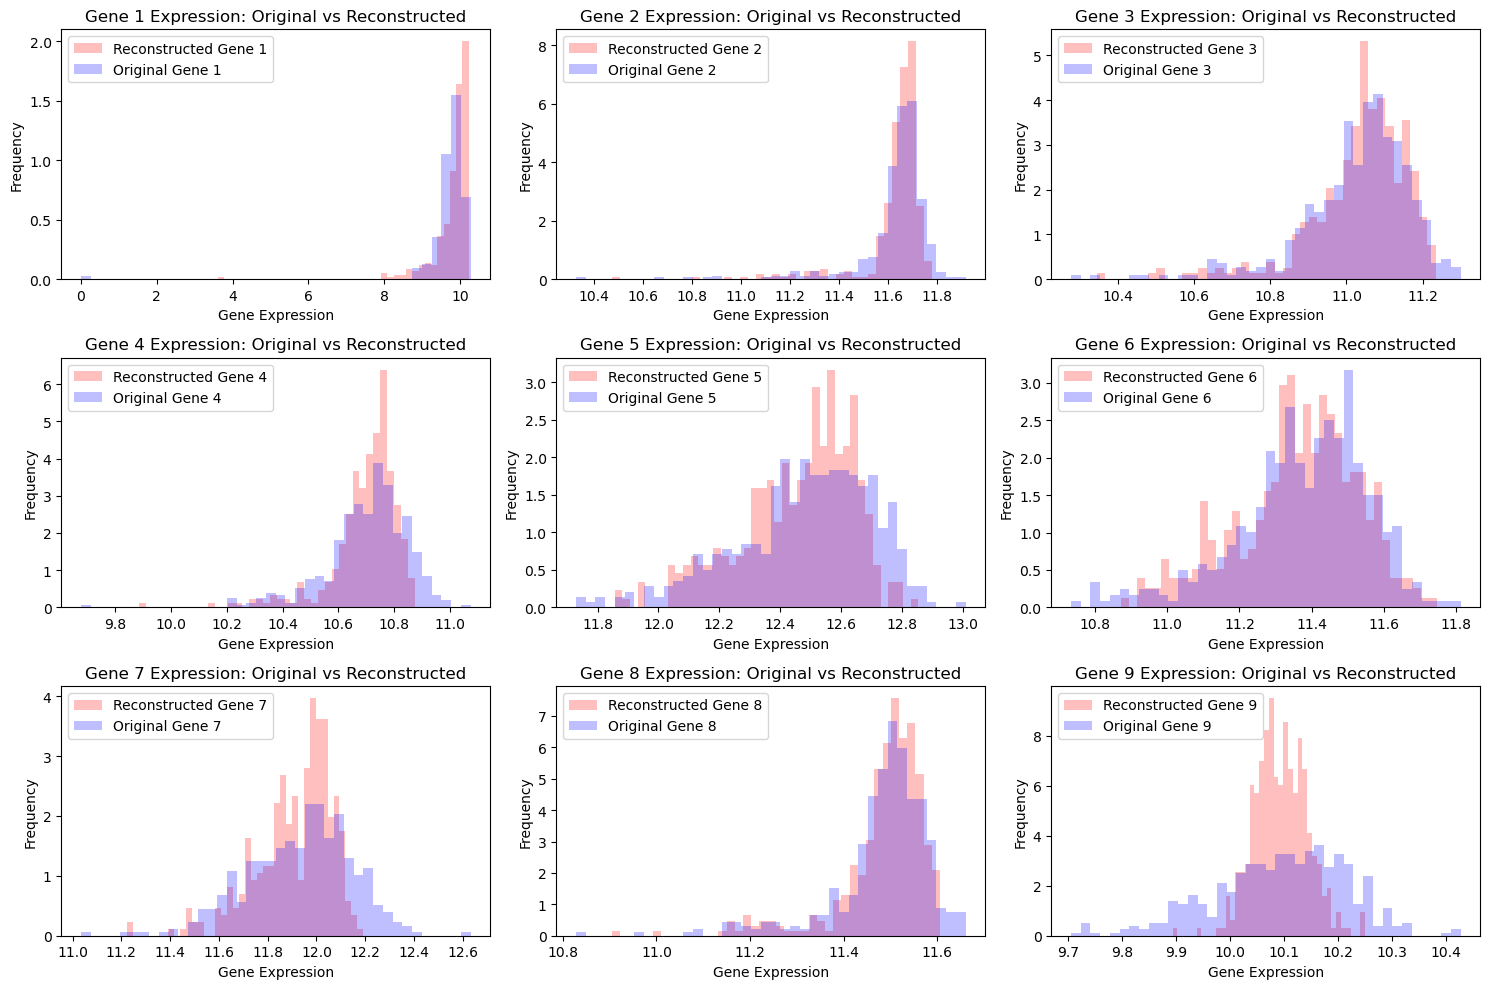

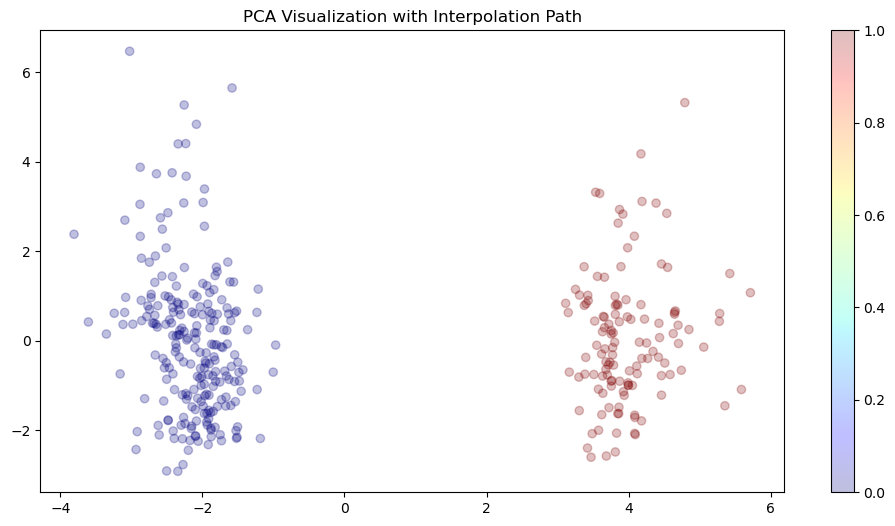

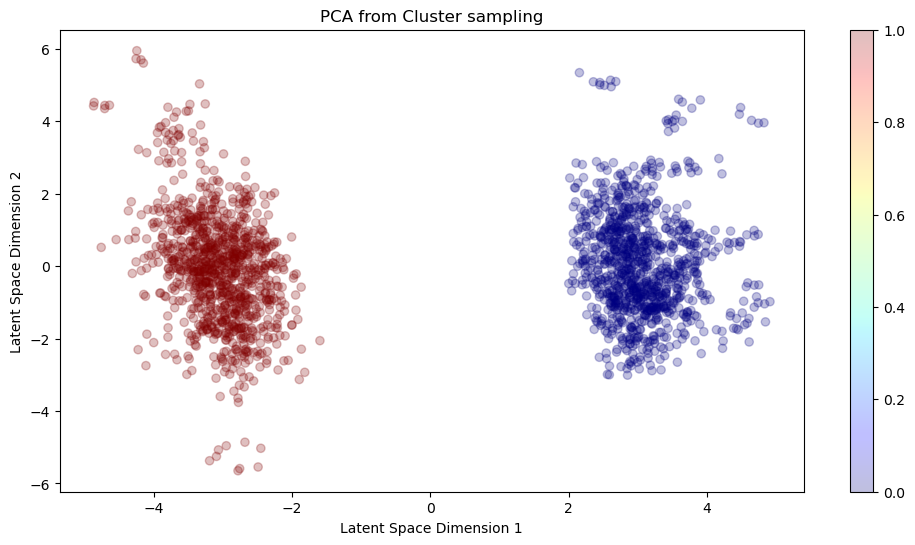

Epoch [701/1000], Recon : 0.0102, KL : 15.6510, Ortho : 478.7208, Class: 0.0076, Accuracy: 100.00%
Epoch [702/1000], Recon : 0.0102, KL : 15.6674, Ortho : 484.6311, Class: 0.0079, Accuracy: 100.00%
Epoch [703/1000], Recon : 0.0104, KL : 15.7349, Ortho : 490.3462, Class: 0.0088, Accuracy: 100.00%
Epoch [704/1000], Recon : 0.0104, KL : 15.5782, Ortho : 479.5914, Class: 0.0073, Accuracy: 100.00%
Epoch [705/1000], Recon : 0.0105, KL : 15.6611, Ortho : 478.4878, Class: 0.0104, Accuracy: 100.00%
Epoch [706/1000], Recon : 0.0102, KL : 15.6614, Ortho : 474.8060, Class: 0.0091, Accuracy: 100.00%
Epoch [707/1000], Recon : 0.0108, KL : 15.6151, Ortho : 467.7542, Class: 0.0082, Accuracy: 100.00%
Epoch [708/1000], Recon : 0.0102, KL : 15.6181, Ortho : 475.2375, Class: 0.0074, Accuracy: 100.00%
Epoch [709/1000], Recon : 0.0102, KL : 15.5883, Ortho : 478.5544, Class: 0.0075, Accuracy: 100.00%
Epoch [710/1000], Recon : 0.0102, KL : 15.6664, Ortho : 476.2016, Class: 0.0071, Accuracy: 100.00%
Epoch [711

Epoch [785/1000], Recon : 0.0101, KL : 15.3908, Ortho : 468.7833, Class: 0.0078, Accuracy: 100.00%
Epoch [786/1000], Recon : 0.0101, KL : 15.2001, Ortho : 457.1921, Class: 0.0079, Accuracy: 100.00%
Epoch [787/1000], Recon : 0.0099, KL : 15.3462, Ortho : 471.6717, Class: 0.0074, Accuracy: 100.00%
Epoch [788/1000], Recon : 0.0102, KL : 15.2910, Ortho : 460.7077, Class: 0.0071, Accuracy: 100.00%
Epoch [789/1000], Recon : 0.0102, KL : 15.4204, Ortho : 462.1857, Class: 0.0065, Accuracy: 100.00%
Epoch [790/1000], Recon : 0.0101, KL : 15.4507, Ortho : 457.2648, Class: 0.0075, Accuracy: 100.00%
Epoch [791/1000], Recon : 0.0102, KL : 15.5464, Ortho : 463.2470, Class: 0.0079, Accuracy: 100.00%
Epoch [792/1000], Recon : 0.0100, KL : 15.7699, Ortho : 470.2825, Class: 0.0069, Accuracy: 100.00%
Epoch [793/1000], Recon : 0.0101, KL : 15.7353, Ortho : 463.6645, Class: 0.0081, Accuracy: 100.00%
Epoch [794/1000], Recon : 0.0098, KL : 15.6653, Ortho : 459.9469, Class: 0.0086, Accuracy: 100.00%
Epoch [795

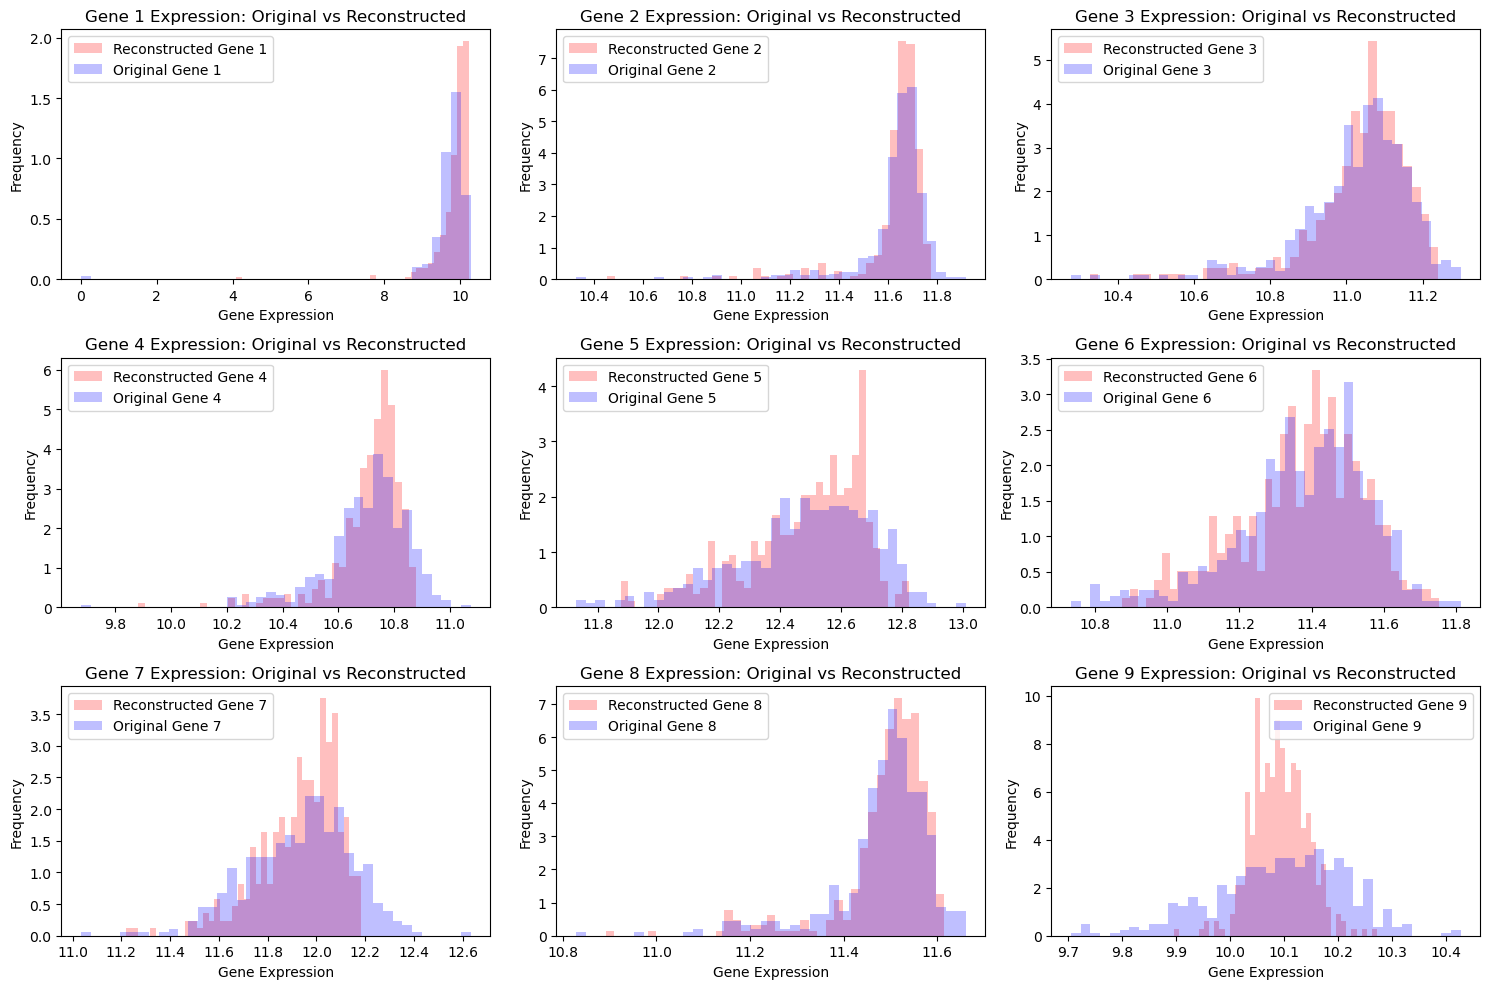

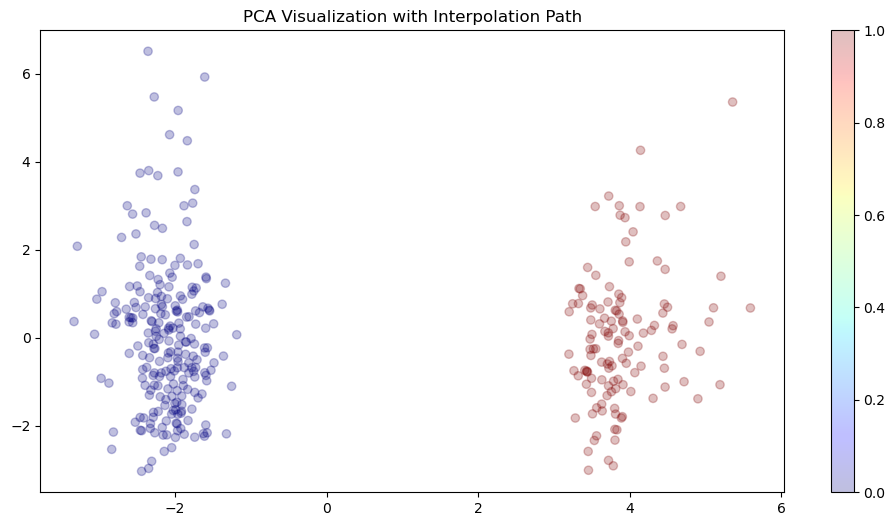

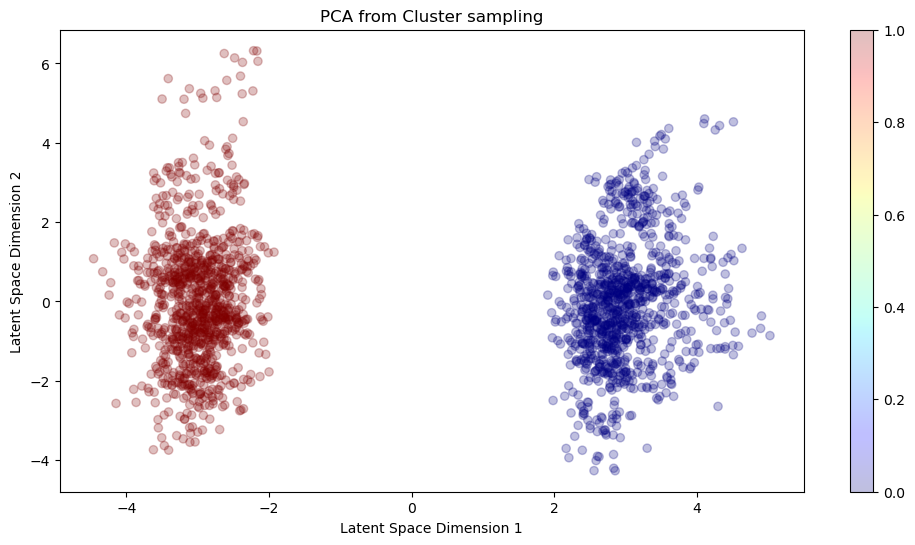

Epoch [801/1000], Recon : 0.0100, KL : 15.6743, Ortho : 468.2684, Class: 0.0080, Accuracy: 100.00%
Epoch [802/1000], Recon : 0.0098, KL : 15.3459, Ortho : 451.8325, Class: 0.0081, Accuracy: 100.00%
Epoch [803/1000], Recon : 0.0100, KL : 15.3402, Ortho : 451.9101, Class: 0.0060, Accuracy: 100.00%
Epoch [804/1000], Recon : 0.0100, KL : 15.3184, Ortho : 457.5911, Class: 0.0058, Accuracy: 100.00%
Epoch [805/1000], Recon : 0.0100, KL : 15.3425, Ortho : 463.1902, Class: 0.0068, Accuracy: 100.00%
Epoch [806/1000], Recon : 0.0102, KL : 15.1819, Ortho : 455.8347, Class: 0.0064, Accuracy: 100.00%
Epoch [807/1000], Recon : 0.0103, KL : 15.2797, Ortho : 464.8262, Class: 0.0071, Accuracy: 100.00%
Epoch [808/1000], Recon : 0.0100, KL : 15.2975, Ortho : 461.9421, Class: 0.0072, Accuracy: 100.00%
Epoch [809/1000], Recon : 0.0106, KL : 15.4451, Ortho : 464.9220, Class: 0.0073, Accuracy: 100.00%
Epoch [810/1000], Recon : 0.0104, KL : 15.5548, Ortho : 479.4106, Class: 0.0095, Accuracy: 100.00%
Epoch [811

Epoch [885/1000], Recon : 0.0101, KL : 14.8703, Ortho : 445.0966, Class: 0.0053, Accuracy: 100.00%
Epoch [886/1000], Recon : 0.0101, KL : 15.0601, Ortho : 445.8421, Class: 0.0065, Accuracy: 100.00%
Epoch [887/1000], Recon : 0.0099, KL : 15.3970, Ortho : 462.0890, Class: 0.0077, Accuracy: 100.00%
Epoch [888/1000], Recon : 0.0097, KL : 15.3550, Ortho : 457.1868, Class: 0.0072, Accuracy: 100.00%
Epoch [889/1000], Recon : 0.0100, KL : 15.4753, Ortho : 463.6208, Class: 0.0101, Accuracy: 100.00%
Epoch [890/1000], Recon : 0.0097, KL : 15.4224, Ortho : 455.7294, Class: 0.0078, Accuracy: 100.00%
Epoch [891/1000], Recon : 0.0099, KL : 15.2111, Ortho : 446.7425, Class: 0.0063, Accuracy: 100.00%
Epoch [892/1000], Recon : 0.0100, KL : 15.1644, Ortho : 451.9153, Class: 0.0051, Accuracy: 100.00%
Epoch [893/1000], Recon : 0.0103, KL : 15.1795, Ortho : 455.9104, Class: 0.0062, Accuracy: 100.00%
Epoch [894/1000], Recon : 0.0104, KL : 15.3003, Ortho : 462.9029, Class: 0.0091, Accuracy: 100.00%
Epoch [895

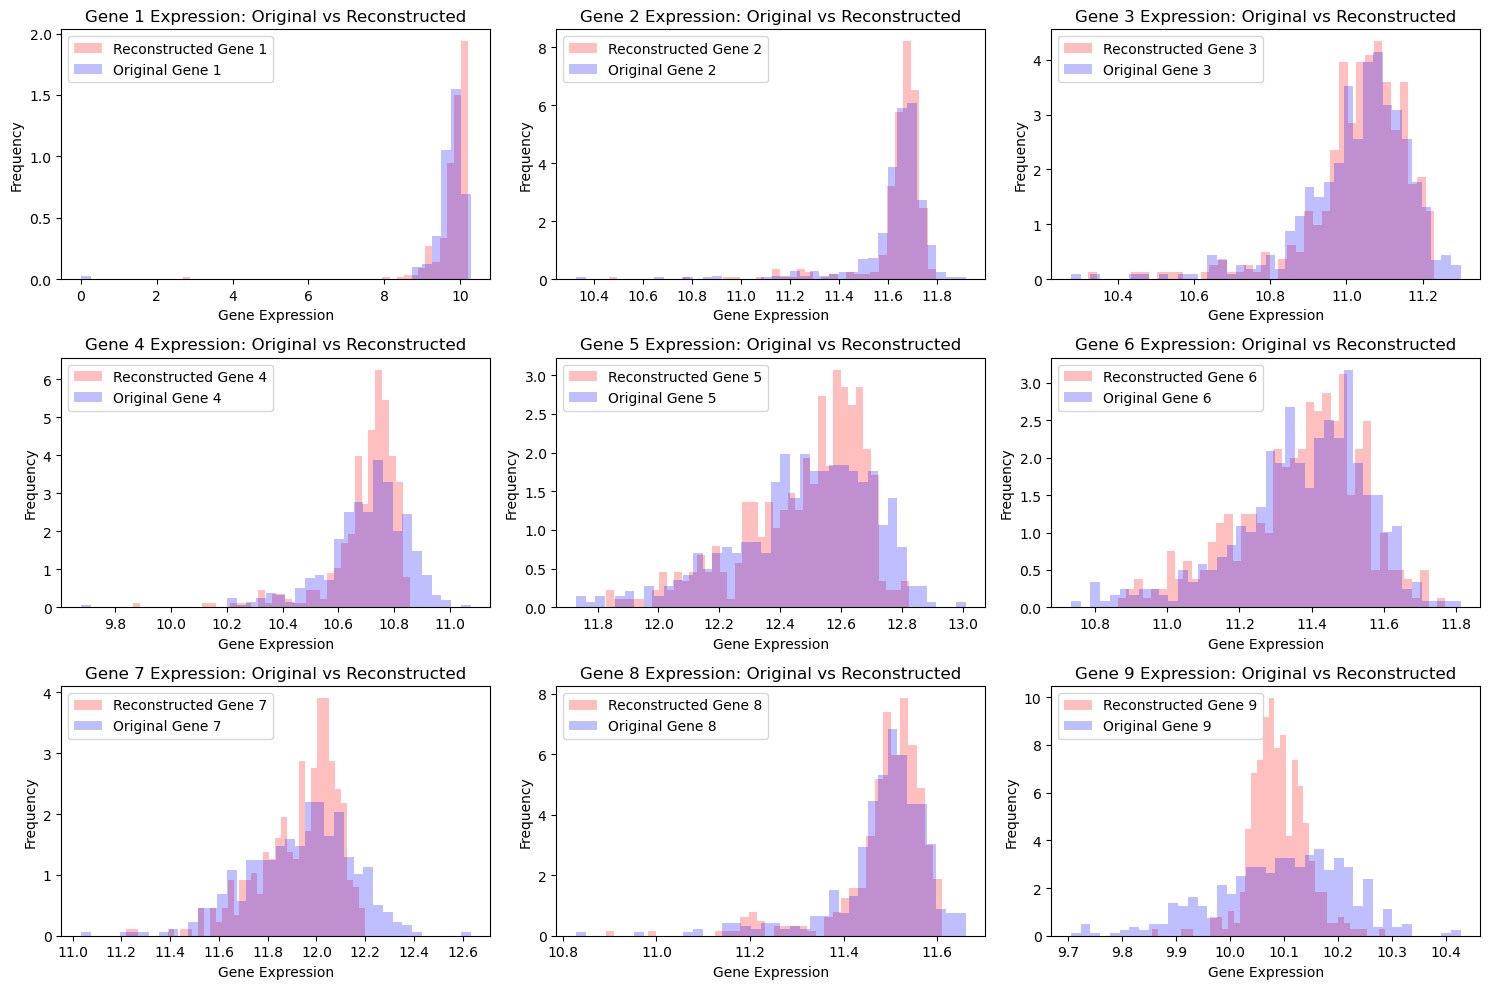

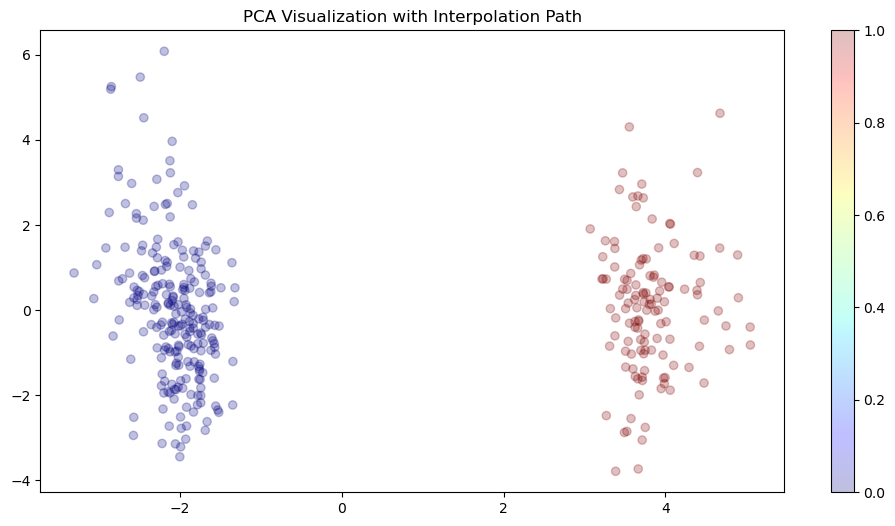

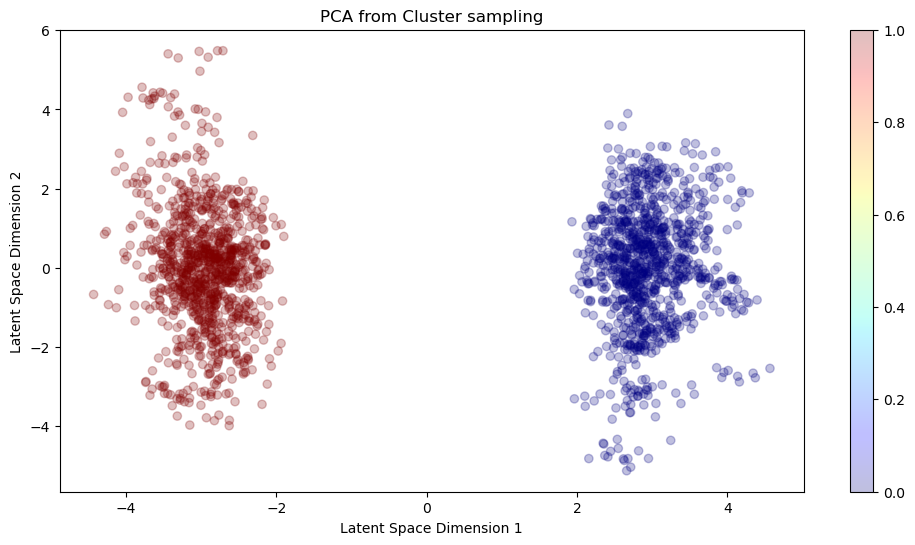

Epoch [901/1000], Recon : 0.0096, KL : 15.2696, Ortho : 454.3508, Class: 0.0065, Accuracy: 100.00%
Epoch [902/1000], Recon : 0.0096, KL : 15.1556, Ortho : 443.9475, Class: 0.0091, Accuracy: 100.00%
Epoch [903/1000], Recon : 0.0099, KL : 15.5221, Ortho : 465.0420, Class: 0.0234, Accuracy: 100.00%
Epoch [904/1000], Recon : 0.0096, KL : 17.0606, Ortho : 586.1340, Class: 0.0291, Accuracy: 100.00%
Epoch [905/1000], Recon : 0.0103, KL : 20.4361, Ortho : 906.1272, Class: 0.6982, Accuracy: 81.07%
Epoch [906/1000], Recon : 0.0110, KL : 25.0132, Ortho : 1344.9621, Class: 1.2449, Accuracy: 73.73%
Epoch [907/1000], Recon : 0.0104, KL : 18.9902, Ortho : 760.5855, Class: 0.4686, Accuracy: 81.36%
Epoch [908/1000], Recon : 0.0105, KL : 16.6027, Ortho : 534.3864, Class: 0.1960, Accuracy: 86.44%
Epoch [909/1000], Recon : 0.0100, KL : 16.0237, Ortho : 445.7948, Class: 0.1458, Accuracy: 94.07%
Epoch [910/1000], Recon : 0.0103, KL : 16.1530, Ortho : 402.4811, Class: 0.0537, Accuracy: 98.59%
Epoch [911/1000

Epoch [985/1000], Recon : 0.0099, KL : 14.9749, Ortho : 426.6571, Class: 0.0061, Accuracy: 100.00%
Epoch [986/1000], Recon : 0.0098, KL : 14.9551, Ortho : 425.3892, Class: 0.0060, Accuracy: 100.00%
Epoch [987/1000], Recon : 0.0095, KL : 14.8453, Ortho : 412.2015, Class: 0.0070, Accuracy: 100.00%
Epoch [988/1000], Recon : 0.0095, KL : 15.1044, Ortho : 436.9971, Class: 0.0057, Accuracy: 100.00%
Epoch [989/1000], Recon : 0.0099, KL : 14.8786, Ortho : 416.1290, Class: 0.0072, Accuracy: 100.00%
Epoch [990/1000], Recon : 0.0098, KL : 14.8214, Ortho : 411.6147, Class: 0.0065, Accuracy: 100.00%
Epoch [991/1000], Recon : 0.0101, KL : 15.0154, Ortho : 427.8342, Class: 0.0055, Accuracy: 100.00%
Epoch [992/1000], Recon : 0.0097, KL : 14.9116, Ortho : 416.8328, Class: 0.0063, Accuracy: 100.00%
Epoch [993/1000], Recon : 0.0098, KL : 15.0114, Ortho : 420.7844, Class: 0.0057, Accuracy: 100.00%
Epoch [994/1000], Recon : 0.0095, KL : 15.0056, Ortho : 423.8811, Class: 0.0058, Accuracy: 100.00%
Epoch [995

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

class Encoder(nn.Module):
    def __init__(self, latent_dim, gene_count, final_sequence_length, num_classes):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(gene_count * final_sequence_length + num_classes, 256)  # Additional feature for labels
        self.fc2 = nn.Linear(256, 128)
        self.fc_mean = nn.Linear(128, latent_dim)
        self.fc_log_var = nn.Linear(128, latent_dim)

    def forward(self, x, y):
        batch_size = x.size(0)  # Get the batch size
        y_expanded = y.expand(batch_size, y.size(1))  # Expand y to match batch size
        x = torch.cat([x, y_expanded], dim=1)  # Concatenate along dim=1
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        mean = self.fc_mean(x)
        log_var = self.fc_log_var(x)
        return mean, log_var


class Decoder(nn.Module):
    def __init__(self, latent_dim, gene_count):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, gene_count)
        self.sigmoid = nn.Sigmoid()

    def forward(self, z):
        x = F.relu(self.fc1(z))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


class CVAE(nn.Module):
    def __init__(self, latent_dim, gene_count, final_sequence_length, num_classes):
        super(CVAE, self).__init__()
        self.encoder = Encoder(latent_dim, gene_count, final_sequence_length, num_classes)
        self.decoder = Decoder(latent_dim, gene_count)
        self.classifier = nn.Linear(latent_dim, num_classes)  # Classification head
        self.latent_dim = latent_dim

    def forward(self, x, y):
        mean, log_var = self.encoder(x, y)
        z = self.reparameterize(mean, log_var)
        reconstruction = self.decoder(z)
        classification_logits = self.classifier(z)  # Logits for classification
        
        return reconstruction, classification_logits, mean, log_var


    def reparameterize(self, mean, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mean + eps * std
    
    

def orthogonal_regularization(matrix):
    inner_product = torch.matmul(matrix, matrix.t())
    loss = torch.norm(inner_product - torch.eye(matrix.size(0)))
    return loss



def cvae_loss(reconstruction, x, mean, log_var, batch_size, y, classifier_loss_weight, y_pred):
    # Calculate the element-wise mean squared error for reconstruction
    mse_elementwise = F.mse_loss(reconstruction, x, reduction='none')
    reconstruction_loss = mse_elementwise.mean()

    # Calculate the KL divergence loss
    kl_divergence_loss = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp()) / batch_size

    # Classification loss (e.g., cross-entropy loss)
    classification_loss = nn.CrossEntropyLoss()(y_pred, y.argmax(dim=1))  # Modify y_pred to use appropriate logits

    orthogonal_loss = orthogonal_regularization(mean)
    # Total loss: reconstruction loss + KL divergence loss + classifier loss
    total_loss = 10000*reconstruction_loss + kl_divergence_loss + classifier_loss_weight * classification_loss 
#     total_loss = reconstruction_loss    

    return total_loss, reconstruction_loss, kl_divergence_loss, classification_loss, orthogonal_loss



# ... Define your Encoder, Decoder, and CVAE classes ...
classifier_loss_weight = 200.0
# Define your data and preprocessing
# X.shape = (457, 67528)
# y.shape = (457, num_classes) where num_classes is the number of classes in your labels
scaler = MinMaxScaler()    
normalized_X = scaler.fit_transform(X)
print("Data Min:", scaler.data_min_)
print("Data Max:", scaler.data_max_)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
    
X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


    
# X_tensor = torch.tensor(normalized_X, dtype=torch.float32)
# y_tensor = torch.tensor(y, dtype=torch.float32)

# Define your data loader
batch_size = 50  # Adjust batch size as needed
gene_count = X.shape[1]  # Number of genes in your data
final_sequence_length = 1  # Since it's a single-dimensional sequence
num_classes = y.shape[1]  # Number of classes in your labels
dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate the CVAE model
latent_dim = 20
cvae = CVAE(latent_dim, gene_count,final_sequence_length, num_classes)

# Define the optimizer
optimizer = torch.optim.Adam(cvae.parameters(), lr=0.0001)

# ... (previous code)

# Training loop
num_epochs = 1000
save_interval = 100  # Set the interval for saving the model
model_name = "cvae_asthma_rnaseq"  # Name for saving the model
for epoch in range(num_epochs):
    total_loss = 0.0
    total_reconstruction_loss = 0.0
    total_kl_loss = 0.0
    total_classification_loss = 0.0  # Initialize classification loss
    total_ortho_loss = 0.0
    total_samples = 0
    correct_predictions = 0
    # Inside your training loop
    for batch_X, batch_y in data_loader:
        optimizer.zero_grad()
        # Reshape batch_y to have shape (batch_size, num_classes)
        batch_y_reshaped = batch_y.view(batch_y.size(0), -1) 
        # Pass through the CVAE
        reconstruction, classification_logits, mean, log_var = cvae(batch_X, batch_y_reshaped)
        # Calculate the VAE loss
        loss, lossR, lossKL, lossClassifier, lossOrtho = cvae_loss(reconstruction, batch_X, mean, log_var, batch_size, batch_y_reshaped, classifier_loss_weight, classification_logits)
        loss.backward()
        optimizer.step()
        total_reconstruction_loss += lossR.item()
        total_kl_loss += lossKL.item()
        total_classification_loss += lossClassifier.item()
        total_ortho_loss += lossOrtho.item()
        probabilities = F.softmax(classification_logits, dim=1)
        predicted_classes = torch.argmax(probabilities, dim=1)
#         print(classification_logits)
        correct_predictions += (predicted_classes == batch_y.argmax(dim=1)).sum().item()
        total_samples += batch_X.size(0)
        
    if epoch % save_interval == 0:
        torch.save(cvae.state_dict(), f"{model_name}.pt")
    if epoch%100 == 0:
         plot_reconstructions()
               
                
        
         l0, l1 = 0,1
         ylabels = np.zeros(len(y))
         for i in range(len(y)):
             ylabels[i] = y[i].argmax()
         X0 = X[ylabels == l0]
         X1 = X[ylabels == l1]
         num_genes = X.shape[1]
         num_samples = 1*10**3
         sigma_factor = 10.

            # samples latent space points around the label0 and 1 centroids and reconstructs (decodes) each point with cvae
         cX0_reconstructed, X1_reconstructed = sample_from_ball_01(num_samples,l0,l1)
        

    average_reconstruction_loss = total_reconstruction_loss / len(data_loader)
    average_kl_loss = total_kl_loss / len(data_loader)
    average_classification_loss = total_classification_loss / len(data_loader)
    accuracy = correct_predictions / total_samples * 100.0
    average_ortho_loss = total_ortho_loss/ len(data_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Recon : {average_reconstruction_loss:.4f}, "
          f"KL : {average_kl_loss:.4f}, "
          f"Ortho : {average_ortho_loss:.4f}, "
          f"Class: {average_classification_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")



In [3]:
dataset_test = TensorDataset(X_test_tensor, y_test_tensor)
data_loader_test = DataLoader(dataset_test, batch_size=1, shuffle=False)
cvae.eval()

num_epochs = 1
for epoch in range(num_epochs):

    total_samples = 0
    correct_predictions = 0
    # Inside your training loop
    for batch_X, batch_y in data_loader_test:
        
        batch_y_reshaped = batch_y.view(batch_y.size(0), -1) 
#         print(batch_y_reshaped)
        batch_y_reshaped = torch.tensor([[0., 0.]], dtype=torch.float32)
        
        # Pass through the CVAE
        reconstruction, classification_logits, mean, log_var = cvae(batch_X, batch_y_reshaped)        
        probabilities = F.softmax(classification_logits, dim=1)
        predicted_classes = torch.argmax(probabilities, dim=1)
#         print(batch_y, probabilities)
        correct_predictions += (predicted_classes == batch_y.argmax(dim=1)).sum().item()
        total_samples += batch_X.size(0)

    
    accuracy = correct_predictions / total_samples * 100.0

    print(f" Testing Classification Accuracy: {accuracy:.2f}%")

# print("Testing complete.")



 Testing Classification Accuracy: 65.17%


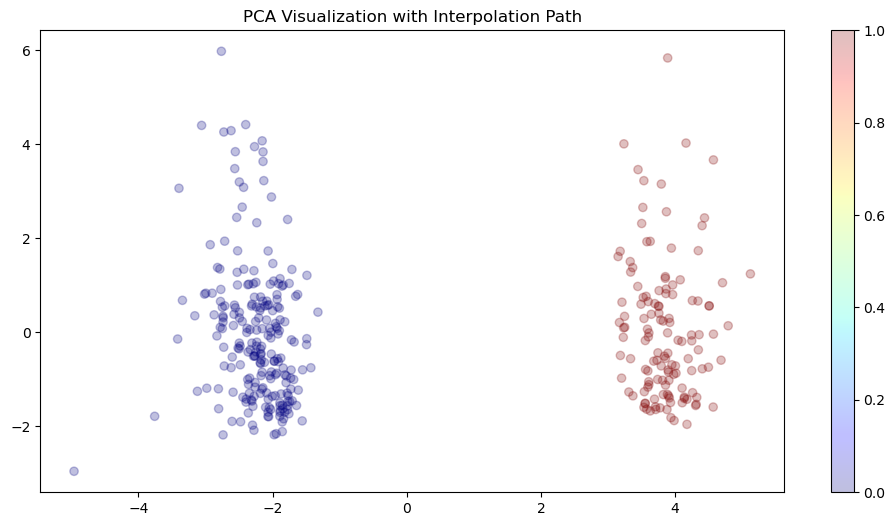

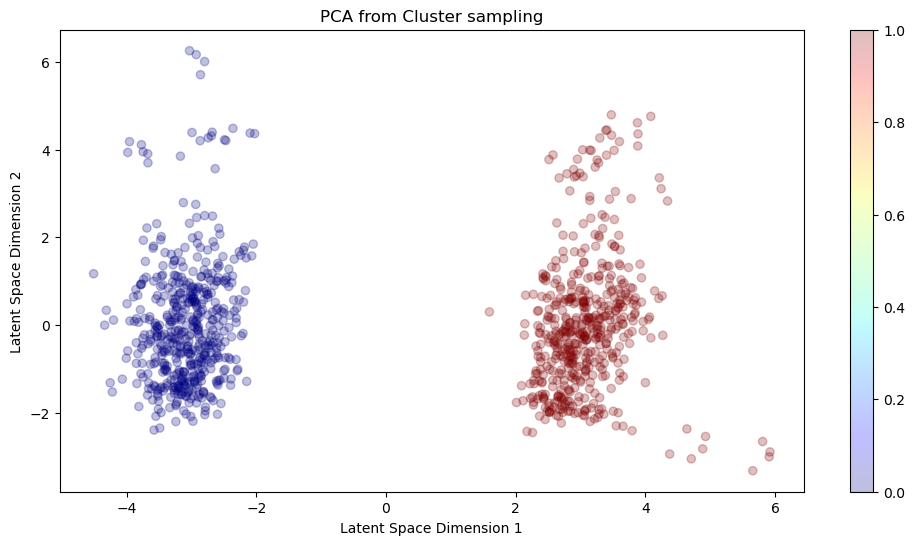

3.758676298417339 1.789709226523475e-195


/Users/benkuznets-speck/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

<Figure size 640x480 with 0 Axes>

In [24]:
def get_selected_genes(select_ngenes, l0, l1):
    X0 = X[ylabels == l0]
    X1 = X[ylabels == l1]
    num_genes = X.shape[1]
    num_samples = 5*10**2
    sigma_factor = 1
    # samples latent space points around the label0 and 1 centroids and reconstructs (decodes) each point with cvae
    X0_reconstructed, X1_reconstructed = sample_from_ball_01(num_samples, l0, l1)
#     X0_reconstructed, X1_reconstructed = sample_from_ball_01_0(num_samples, sigma_factor)

    # Perform t-test for each gene
    p_values, p_values_R = [], []
    for gene_idx in range(num_genes):
        t_stat, p_value = stats.ttest_ind(X0[:, gene_idx], X1[:, gene_idx])
        p_values.append(p_value)
        t_stat, p_value = stats.ttest_ind(X0_reconstructed[:, gene_idx], X1_reconstructed[:, gene_idx])
        p_values_R.append(p_value)

    # Correct for multiple comparisons (e.g., Bonferroni correction)
    p_values, p_values_R = np.array(p_values) * num_genes, np.array(p_values_R) * num_genes  # Bonferroni correction
    print(min(p_values), min(p_values_R))
    # Sort significant genes by p-value
    ind_genes_R =  np.flip(np.argsort(-np.log10(p_values_R))) #sorts from lowest p value to heighest 

    significance_thresholds = [  5*10**(-2)]


    plt.figure()
    for significance_threshold in significance_thresholds:

        ttest_results = np.zeros(len(p_values)).astype(int)
        for i in range(len(p_values)):
            if p_values[i] < significance_threshold:
                ttest_results[i] = 1

        ttest_results = ttest_results[ind_genes_R]
        vae_scores = -np.log10(p_values_R)[ind_genes_R]
        
        fpr, tpr, thresholds = roc_curve(ttest_results, vae_scores)
        roc_auc = roc_auc_score(ttest_results, vae_scores)

        plt.plot(fpr, tpr, lw=3, label=f'ROC curve (AUC = {roc_auc:.2f})')
#         np.save('rocauc_ib', [fpr, tpr, roc_auc])
        plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel('False Positive Rate', fontsize = 20)
        plt.ylabel('True Positive Rate', fontsize = 20)
#         plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
    
#     plt.savefig('fig1c.pdf', bbox_inches='tight')
    plt.show()
    
#     keys = np.load('gene_keys_ib_rna_seq.npy')
#     glist = []
#     for i in range(select_ngenes):
#         if keys[ind_genes_R[i]].split()[1] != 'NA':
#             print(keys[ind_genes_R[i]].split()[1])
#             glist.append(keys[ind_genes_R[i]].split()[1])
#         else: glist.append('0')
            
#     return glist


select_ngenes = 200
glist = []
for i in range(1):
    glist.append(get_selected_genes(select_ngenes, l0, l1))
    

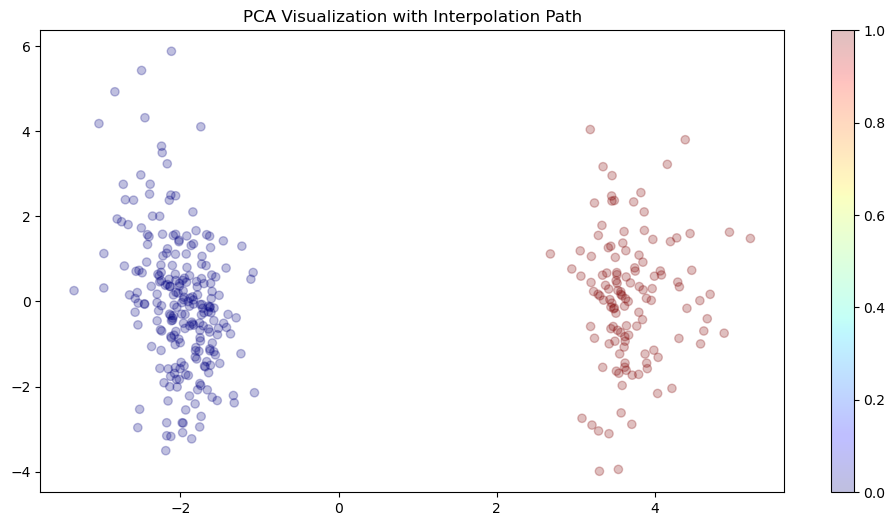

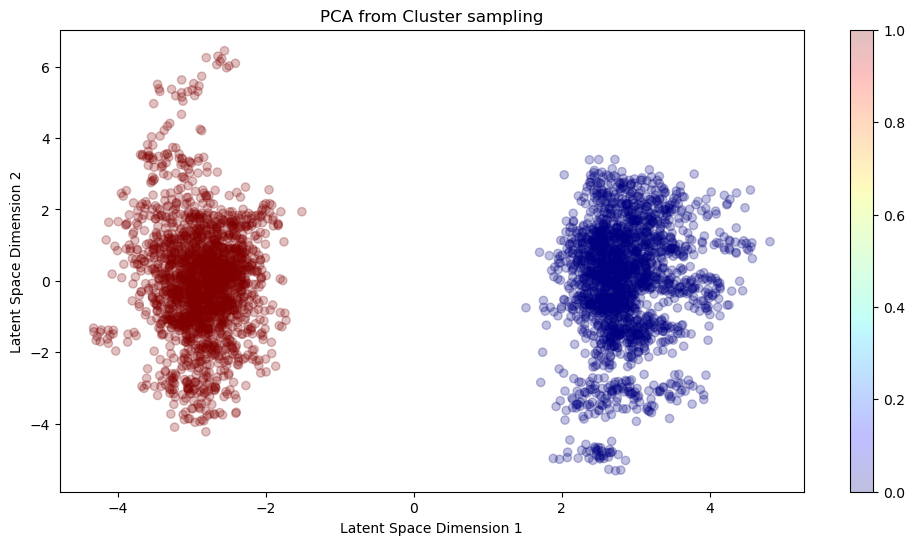

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.decomposition import SparsePCA
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

def get_E01(X, ylabels, num_components=100, num_samples=2*10**3, sigma_factor=1., c_thresh=0.5, top_n=7):

    normalized_X = scaler.fit_transform(X)
    # Sample latent space points around the label 0 and 1 centroids and reconstruct them with CVAE
    X0_reconstructed, X1_reconstructed = sample_from_ball_01(num_samples, l0, l1)
    X0_reconstructed = scaler.inverse_transform(X0_reconstructed)
    X1_reconstructed = scaler.inverse_transform(X1_reconstructed)
    
    Xr = np.concatenate((X0_reconstructed, X1_reconstructed))
    U, S, Vt = np.linalg.svd(Xr.T, full_matrices=True)


    E01 = Xr@U
            

    one_hot_labels = np.eye(E01.shape[0])
#     # Concatenate the one-hot labels with the original E01 matrix
    E01_with_labels = np.concatenate((one_hot_labels, E01), axis=1)

        
    return E01, E01_with_labels, U,Vt, Xr, X0_reconstructed, X1_reconstructed

# Usage example:
E01_full, E01_with_labels, U,Vt, Xr, X0r, X1r = get_E01(X, ylabels)


max_components = 200
topU = U[:,:max_components]
E01 = Xr@topU

dX = np.zeros(np.shape(Xr))
for i in range(len(dX)):
    dX[i] = Xr[i] - np.mean(Xr[i])
E01test = dX@topU

In [5]:
np.save('egenes_aa',E01)
np.save('Xr_aa',[X0r, X1r])
np.save('U_aa',U)

In [ ]:
E01 = np.load('egenes_aa.npy')
X0r, X1r = np.load('Xr_aa.npy', allow_pickle = True)
U = np.load('U_aa.npy')

In [29]:
np.save('egenes_asthma',E01)

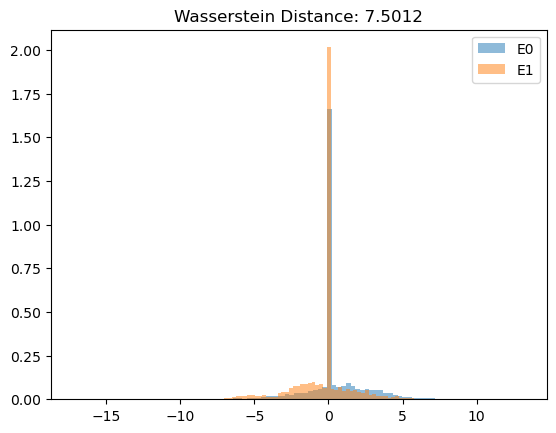

In [41]:
import numpy as np
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
def project_onto_eg(ind, verbose = False):
    egdotX0, egdotX1 = np.zeros(len(E01)), np.zeros(len(E01))
    Xr = np.concatenate((X0r, X1r))
    
    for i in range(int(len(Xr)/2)):
#         print(len(E01), len(Xr))
        egdotX0[i] = U.T[ind]@Xr[i]
        egdotX1[i] = U.T[ind]@Xr[i+int(len(Xr)/2)-1]

    # Create histograms
    histogram_e0, bin_edges_e0 = np.histogram(egdotX0, bins=80, density=True)
    histogram_e1, bin_edges_e1 = np.histogram(egdotX1, bins=80, density=True)

    # Calculate the bin centers
    bin_centers_e0 = 0.5 * (bin_edges_e0[1:] + bin_edges_e0[:-1])
    bin_centers_e1 = 0.5 * (bin_edges_e1[1:] + bin_edges_e1[:-1])

    # Calculate the Wasserstein distance
    distance = wasserstein_distance(bin_centers_e0, bin_centers_e1)
    if verbose:
    # Plot the histograms and display the distance
        plt.bar(bin_centers_e0, histogram_e0, width=(bin_centers_e0[1] - bin_centers_e0[0]), alpha=0.5, label='E0')
        plt.bar(bin_centers_e1, histogram_e1, width=(bin_centers_e1[1] - bin_centers_e1[0]), alpha=0.5, label='E1')
        plt.legend()
        plt.title(f"Wasserstein Distance: {distance:.4f}")
        plt.show()

#     print(f"Wasserstein Distance: {distance:.4f}")

    return egdotX0, egdotX1, distance

egdotX0, egdotX1, distance = project_onto_eg(top_egene_indices[5], verbose = True)

Accuracy: 1.0
Confusion Matrix:
 [[378   0]
 [  0 422]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       422

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Log Probabilities for Positive Class:
 [-2.9829541  -0.01975411 -2.77264015 -0.07042994 -0.09131453 -2.49095629
 -2.96935228 -0.0905514  -2.66602244 -0.04401221]


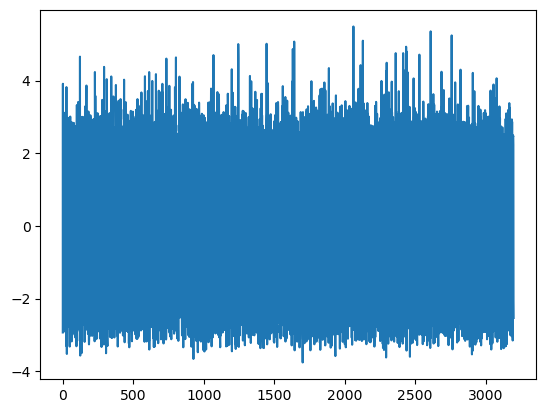

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X is your gene expression matrix and y_class is the one-hot encoded vector
# Convert one-hot encoded labels to binary labels

y_class = []
for i in range(int(len(E01)/2)):
    y_class.append([0.,1.])
for i in range(int(len(E01)/2)):
    y_class.append([1.,0.])
y_class  = np.asarray(y_class)

# Split the data into training and testing sets
normalized_X = scaler.fit_transform(E01)
# X_train, X_test, y_train, y_test = train_test_split(normalized_X, np.argmax(y_class, axis=1), test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(normalized_X, np.argmax(y_class, axis=1), test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, np.argmax(y, axis=1), test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = normalized_X,normalized_X, np.argmax(y_class, axis=1) ,np.argmax(y_class, axis=1) 
# Initialize the logistic regression model
model = LogisticRegression(max_iter=10000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
# y_pred = model.predict(X_train)

# Get predicted probabilities for the positive class
log_probabilities = model.predict_log_proba(X_train)[:, 1]

# Other evaluations
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Print the first few predicted log probabilities
print("Log Probabilities for Positive Class:\n", log_probabilities[:10])


# Get log-odds for positive and negative classes
log_odds_positive = model.predict_log_proba(X_train)[:, 1]
log_odds_negative = model.predict_log_proba(X_train)[:, 0]

# Calculate the odds ratio
odds_ratio = log_odds_positive - log_odds_negative

# Print the first few odds ratios
plt.plot(odds_ratio)
plt.show()




1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
Posterior Inclusion Probabilities: [1.9884e-01 1.0000e+00 5.1302e-01 2.3810e-02 5.7425e-01 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 2.4598e-01 1.0000e+00 1.0000e+00 4.2900e-03 1.0000e+00 1.0000e+00
 7.9472e-01 1.0000e+00 9.8399e-01 1.0000e+00 1.0000e+00 9.5639e-01
 1.7060e-02 1.0000e+00 2.1730e-02 9.1100e-03 1.6910e-02 5.9500e-03
 2.6800e-03 9.7373e-01 1.0000e+00 3.81

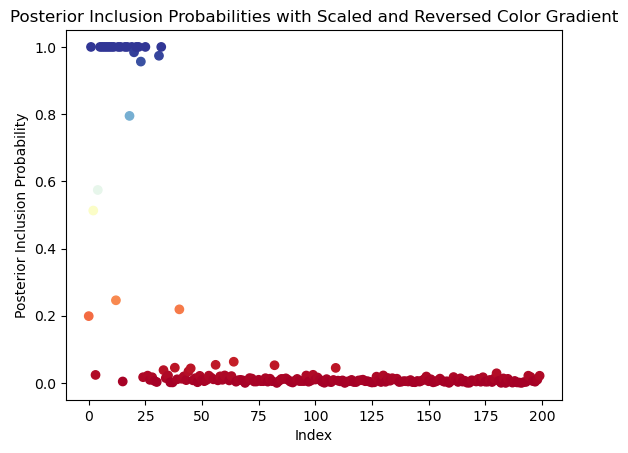

In [8]:
import numpy as np
import scipy.stats as stats
from numba import jit

# Assuming X_train, odds_ratio are defined
# Define simulated data
# np.random.seed(42)
negenes = len(X_train[0])

sig2 = 4

pk = np.zeros(negenes)
m = negenes
for k in range(len(pk)):
    pk[k] = (1/m)**k*(1-1/m)**(m-k)

z_values, R = (X_train.T @ odds_ratio) / (negenes * sig2) ** 0.5, (X_train.T @ X_train) / negenes
z_values = np.array(z_values, dtype=np.float32)
R = np.array(R, dtype=np.float32)
R = R.astype(np.float64)

# Vectorized log-likelihood function
@jit(nopython=True)
def log_likelihood(gamma, s, R, z_values):
    gamma = gamma.astype(np.float64)  # Cast gamma to float64
    Sigma = np.diag(gamma * s**2.*negenes)
    cov_matrix = R + R @ Sigma @ R
    prior_k = pk[len(np.nonzero(gamma)[0])]
    
    # Convert z_values to float64
    z_values = z_values.astype(np.float64)
    
    # Perform the dot product with arrays of the same dtype
    dot_product = np.dot(z_values, np.linalg.solve(cov_matrix, z_values))
    return np.log(prior_k) - 0.5 * dot_product

@jit(nopython=True)
def metropolis_mcmc(num_samples, burn_in, proposal_std):
    # Initialize parameters
    gamma = np.random.randint(0, 2, size=negenes)
    s = 0.05
    pip = np.zeros(negenes, dtype=np.int64)
#     samples = np.zeros((num_samples, negenes), dtype=np.int64)
    loss = np.zeros(num_samples)
    for _ in range(num_samples + burn_in):
        index_to_flip = np.random.randint(0, negenes)
        gamma_proposed = gamma.copy()
        gamma_proposed[index_to_flip] = 1 - gamma_proposed[index_to_flip]
        s_proposed = s + np.random.normal(0.0, proposal_std)
#         s_proposed = s 

        ll_new, ll_old = log_likelihood(gamma_proposed, s_proposed, R, z_values),log_likelihood(gamma, s, R, z_values)
        # Calculate acceptance ratio
        log_ratio = ll_new - ll_old
    
        if np.log(np.random.rand()) < log_ratio:
            gamma, s = gamma_proposed, s_proposed
            

        # Save samples after burn-in
        if _ >= burn_in:
            loss[_ - burn_in] = ll_old
#             samples[_ - burn_in, :] = gamma.copy()
            pip = pip + gamma.copy()
            if _ % 1000 == 0:
                print(_)

    return loss, pip/num_samples



# Run Metropolis MCMC
num_samples = 100000
burn_in = 1000
# num_samples = 100
# burn_in = 100
proposal_std = 0.001
loss, posterior_inclusion_probabilities = metropolis_mcmc(num_samples, burn_in, proposal_std)

# # Calculate MLE of gamma
# mle_gamma = np.mean(samples, axis=0)

# Calculate posterior inclusion probabilities
# posterior_inclusion_probabilities = np.mean(samples, axis=0)

# Print results
# print("MLE of gamma:", mle_gamma)
print("Posterior Inclusion Probabilities:", posterior_inclusion_probabilities)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Assuming posterior_inclusion_probabilities is defined

# Normalize the inclusion probabilities to the range [0, 1]
norm = Normalize(vmin=0, vmax=1)
colors = plt.cm.RdYlBu(norm(posterior_inclusion_probabilities))

# Plot the points with the reversed colors
plt.scatter(range(len(posterior_inclusion_probabilities)), posterior_inclusion_probabilities, c=colors, marker='o')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Posterior Inclusion Probability')
plt.title('Posterior Inclusion Probabilities with Scaled and Reversed Color Gradient')

# Show the colorbar to indicate the mapping from values to colors
# cbar = plt.colorbar()
# cbar.set_label('Posterior Inclusion Probability')

# Show the plot
plt.show()

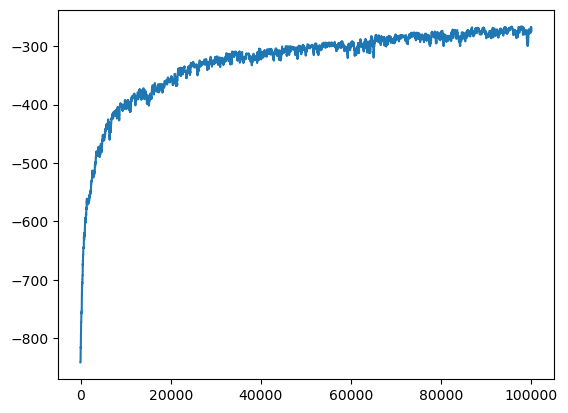

In [10]:
plt.plot(loss)
# plt.axhline(-390)

In [11]:
sorted_egene_indices = np.argsort(posterior_inclusion_probabilities)
np.save('sorted_egene_indices_asthma',sorted_egene_indices)
top_egene_indices = np.flip(np.argsort(posterior_inclusion_probabilities)[-50:])

In [12]:
sorted_egene_indices = np.load('sorted_egene_indices_asthma.npy')
top_egene_indices = np.flip(sorted_egene_indices[-50:])
print(top_egene_indices)

[ 25   9  19  21  17  16  14  13  11  10   8   7   6   5  22   1  32  20
  31  23  18   4   2  12  40   0  64  56  82  38 109  45  33  44 180  99
   3  60 130  35  96  26  53 194 199  49  63  42  58 149]


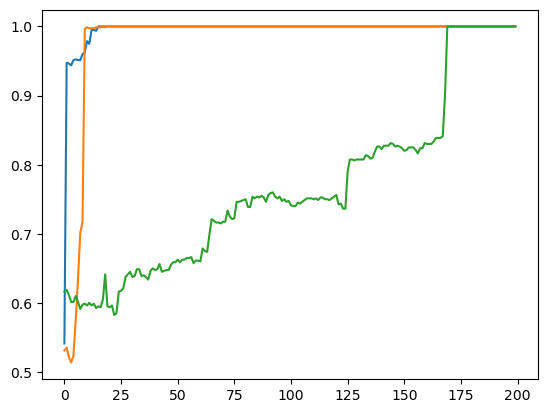

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X is your gene expression matrix and y_class is the one-hot encoded vector
# Convert one-hot encoded labels to binary labels

y_class = []
for i in range(int(len(E01)/2)):
    y_class.append([0.,1.])
for i in range(int(len(E01)/2)):
    y_class.append([1.,0.])
y_class  = np.asarray(y_class)

max_acc = 0.
accuracy = []
for i in range(200):
    
        
        
# Split the data into training and testing sets
    eval_inds = np.flip(sorted_egene_indices)[:i+1]
    scaler = MinMaxScaler() 
    normalized_X = scaler.fit_transform(E01[:,eval_inds])
        # X_train, X_test, y_train, y_test = train_test_split(normalized_X, np.argmax(y_class, axis=1), test_size=0.2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(normalized_X, np.argmax(y_class, axis=1), test_size=0.2, random_state=42)
        # X_train, X_test, y_train, y_test = train_test_split(X, np.argmax(y, axis=1), test_size=0.2, random_state=42)
        # X_train, X_test, y_train, y_test = normalized_X,normalized_X, np.argmax(y_class, axis=1) ,np.argmax(y_class, axis=1) 
        # Initialize the logistic regression model
    model = LogisticRegression(max_iter=10000)

        # Train the model on the training data
    model.fit(X_train, y_train)

        # Make predictions on the testing data
    y_pred = model.predict(X_test)
     
    accuracy.append(accuracy_score(y_test, y_pred)) 
    
top50_accuracy = []
for i in range(200):
    
        
        
# Split the data into training and testing sets
    eval_inds = np.arange(i+1)
    scaler = MinMaxScaler() 
    normalized_X = scaler.fit_transform(E01[:,eval_inds])
        # X_train, X_test, y_train, y_test = train_test_split(normalized_X, np.argmax(y_class, axis=1), test_size=0.2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(normalized_X, np.argmax(y_class, axis=1), test_size=0.2, random_state=42)
        # X_train, X_test, y_train, y_test = train_test_split(X, np.argmax(y, axis=1), test_size=0.2, random_state=42)
        # X_train, X_test, y_train, y_test = normalized_X,normalized_X, np.argmax(y_class, axis=1) ,np.argmax(y_class, axis=1) 
        # Initialize the logistic regression model
    model = LogisticRegression(max_iter=10000)

        # Train the model on the training data
    model.fit(X_train, y_train)

        # Make predictions on the testing data
    y_pred = model.predict(X_test)
     
    top50_accuracy.append(accuracy_score(y_test, y_pred))
    
rand_accuracy = []
arr = np.arange(200)
np.random.shuffle(arr)
for i in range(200):
    
        
        
# Split the data into training and testing sets
    eval_inds = arr[:i+1]
    scaler = MinMaxScaler() 
    normalized_X = scaler.fit_transform(E01[:,eval_inds])
        # X_train, X_test, y_train, y_test = train_test_split(normalized_X, np.argmax(y_class, axis=1), test_size=0.2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(normalized_X, np.argmax(y_class, axis=1), test_size=0.2, random_state=42)
        # X_train, X_test, y_train, y_test = train_test_split(X, np.argmax(y, axis=1), test_size=0.2, random_state=42)
        # X_train, X_test, y_train, y_test = normalized_X,normalized_X, np.argmax(y_class, axis=1) ,np.argmax(y_class, axis=1) 
        # Initialize the logistic regression model
    model = LogisticRegression(max_iter=10000)

        # Train the model on the training data
    model.fit(X_train, y_train)

        # Make predictions on the testing data
    y_pred = model.predict(X_test)
     
    rand_accuracy.append(accuracy_score(y_test, y_pred))
  

plt.plot(accuracy)
plt.plot(top50_accuracy)
plt.plot(rand_accuracy)
plt.show()



In [14]:
import cmapPy
import cmapPy.pandasGEXpress.parse as parse
Delta_gctx = parse.parse('gene_perturbations_for_ben.gctx')
Delta_gctx.data_df
import pandas as pd
import gzip

# Specify the path to the gzipped text file
file_path = 'mart_export.txt-2.gz'

# Open the gzipped file and read it into a DataFrame
with gzip.open(file_path, 'rt') as file:
    df_genenames = pd.read_csv(file, sep='\t')

# Display the DataFrame
print(df_genenames)

       Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Gene name,Gene Synonym
0       ENSG00000276191,ENSG00000276191.4,ENST00000632...                                                            
1       ENSG00000276191,ENSG00000276191.4,ENST00000617...                                                            
2       ENSG00000276191,ENSG00000276191.4,ENST00000616...                                                            
3       ENSG00000276191,ENSG00000276191.4,ENST00000633...                                                            
4       ENSG00000276191,ENSG00000276191.4,ENST00000616...                                                            
...                                                   ...                                                            
541863  ENSG00000288396,ENSG00000288396.1,ENST00000672...                                                            
541864  ENSG00000285065,ENSG00000285065.1,ENST00000643..

In [ ]:
column_name = df_genenames.columns[0]
print("Column Name:", column_name)

import pandas as pd

# Assuming df_genenames is your DataFrame
# Replace 'your_column_name' with the actual column name in your DataFrame



# Extract the last two words
df_genenames['last_two_words'] = df_genenames[column_name].apply(lambda x: ','.join(x.split(',')[-2:]))

# Display the DataFrame with the new column
# print(df_genenames)

# Initialize gene_dict
gene_dict = []

# Iterate through column_names_list
for element in column_names_list:
    # Search for the element in df_genenames
    match = df_genenames[df_genenames[column_name].str.contains(element, case=False)]
    
    # Check if a match is found
    if not match.empty:
        # Extract the last two words from the match
        last_two_words = match['last_two_words'].iloc[0]
        
        # Add to gene_dict
        gene_dict.append({'element': element, 'last_two_words': last_two_words})
    else:
        # Handle the case where no match is found
        gene_dict.append({'element': element, 'last_two_words': 'NA'})

# Display gene_dict
print(gene_dict)

np.save('gene_pert_dict', gene_dict)


In [15]:
gene_dict = np.load('gene_pert_dict.npy', allow_pickle=True)
keys = np.load('gene_keys_asthma_rna_seq.npy', allow_pickle=True)
print(gene_dict, keys)

[{'element': 'ENSG00000260010', 'last_two_words': 'ZNF720P1,'}
 {'element': 'ENSG00000207220', 'last_two_words': 'RNU1-57P,'}
 {'element': 'ENSG00000232458', 'last_two_words': 'LINC01450,'} ...
 {'element': 'ENSG00000202257', 'last_two_words': 'RNA5S16,RN5S16'}
 {'element': 'ENSG00000207769', 'last_two_words': 'MIR586,hsa-mir-586'}
 {'element': 'ENSG00000264610', 'last_two_words': 'MIR4685,hsa-mir-4685'}] ['ENSG00000000003' 'ENSG00000000419' 'ENSG00000000457' ...
 'ENSG00000280411' 'ENSG00000280433' 'ENSG00000280434']


In [13]:
matching_indices = []

for i, sg_element in enumerate(keys):
    print(i)
    for j, gene_entry in enumerate(gene_dict):
        element = gene_entry['element']
        last_two_words = gene_entry['last_two_words']
        words = last_two_words.split(',')
        
        if sg_element == element:
            print(sg_element,element, words[0])
            matching_indices.append([i,j])

print(matching_indices)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [16]:
matching_indices = np.array(matching_indices)
np.save('matching_indices_asthma_rnaseq', matching_indices)

NameError: name 'matching_indices' is not defined

In [17]:
matching_indices = np.load('matching_indices_asthma_rnaseq.npy')

In [18]:
disease_ind, gene_pert_ind = matching_indices[:,0], matching_indices[:,1]

In [29]:
estar = U.T[top_egene_indices][:,disease_ind]

In [25]:
top_egene_indices

array([ 25,   9,  19,  21,  17,  16,  14,  13,  11,  10,   8,   7,   6,
         5,  22,   1,  32,  20,  31,  23,  18,   4,   2,  12,  40,   0,
        64,  56,  82,  38, 109,  45,  33,  44, 180,  99,   3,  60, 130,
        35,  96,  26,  53, 194, 199,  49,  63,  42,  58, 149])

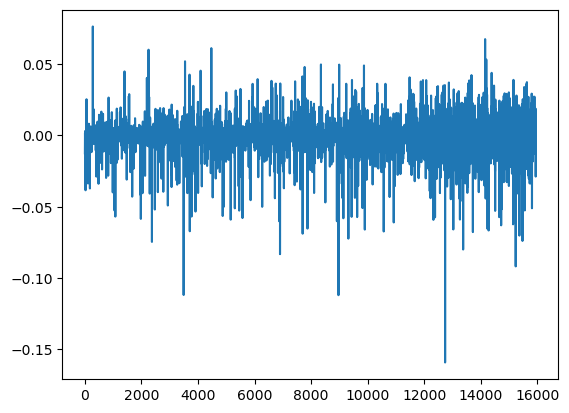

In [20]:
plt.plot(estar[0])

In [31]:
A = Delta_gctx.data_df.iloc[:,gene_pert_ind].to_numpy()
Delta_cc = np.mean(X1r[:,disease_ind] - X0r[:,disease_ind], axis = 0)

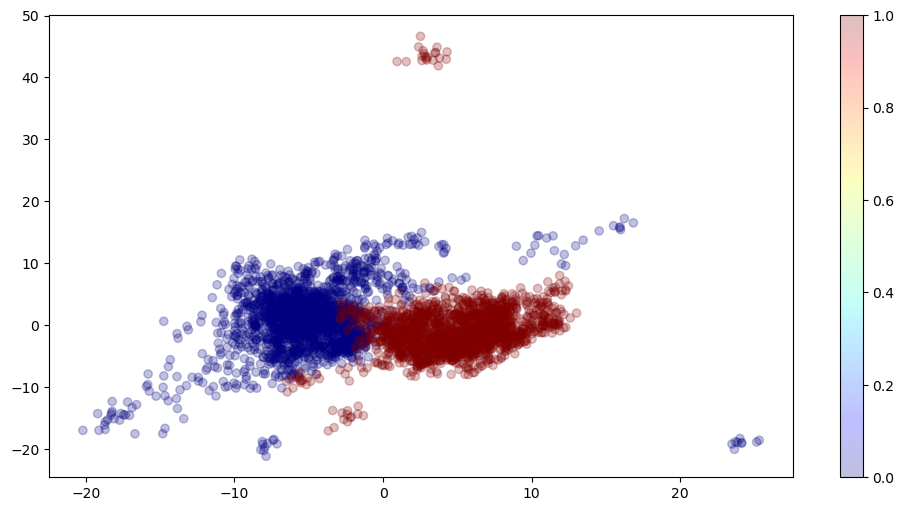

In [47]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
def plot_estar_pca(xI, xF, estar):
    
    xF0, xI0 = xF, xI
    xF = [estar[:10]@xF0[i] for i in range(len(xF0))]
    xI = [estar[:10]@xI0[i] for i in range(len(xI0))]
    xtot = np.concatenate((xI, xF), axis=0)
    true_labels = np.concatenate((np.zeros(len(xI)), np.ones(len(xF))), axis=0)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(xtot)
    plt.figure(figsize=(12, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c = true_labels, cmap='jet', alpha=0.25)
    plt.colorbar()
#     for i in range(1000):
#         xi = estar@X1r[:,disease_ind][i] 
#     #     print(xi[0], xi[1])
# #         plt.plot(xi[0], xi[1], 'o', color = 'r', alpha = .2)
#         xi = estar@X0r[:,disease_ind][i] 
    #     print(xi[0], xi[1])
#         plt.plot(xi[0], xi[1], 'o', color = 'b', alpha = .2)
#     plt.show()

plot_estar_pca(X0r[:,disease_ind], X1r[:,disease_ind], estar)

In [39]:
len(np.nonzero(optimal_u)[0])

1222

In [49]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function L(u)
def objective_function(u, A, D, lambda_val):
    term1 = sum((D - A@u)**2.)**.5 + lambda_val*np.sum(u)
    return term1 

# Define the constraint that u elements should be between 0 and 1
constraint = {'type': 'ineq', 'fun': lambda u: np.array([1 - elem for elem in u] + [elem for elem in u])}

# Example data
D = estar@Delta_cc   # Replace this with your actual D vector
lambda_val = .1          # Replace this with your actual lambda value
EA = estar@A.T
# Initial guess for u
initial_u = np.random.rand(len(A))

# Solve the optimization problem
# result = minimize(objective_function, initial_u, args=(A.T, D, lambda_val), constraints=constraint)
result = minimize(objective_function, initial_u, args=(EA, D, lambda_val), constraints=constraint)

# Extract the optimal u
optimal_u = result.x


print("Optimal u:", optimal_u)
print("Objective function value:", result.fun)



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1225 is different from 15946)

In [31]:
1-np.linalg.norm(estar@(Delta_cc-A.T@optimal_u),2)/np.linalg.norm(estar@Delta_cc,2)

0.9966173605195452

In [32]:
np.save('uopt_asthma',optimal_u )
np.save('R2_asthma', 0.9966173605195452)

In [18]:
sorted_optimal_u = np.argsort(optimal_u)[::-1]
Delta_gctx.row_metadata_df.iloc[sorted_optimal_u[:60]]



rhd     bioproject fin_cell_line  \
rid                                
52973       ENCODE         HepG2   
45361  PRJNA478242          HeLa   
52870       ENCODE         HepG2   
45842  PRJNA552456         hPAEC   
45287  PRJNA454454        MCF10A   
43559    PRJEB6731        CEM-SS   
44007  PRJNA318778          NONE   
44119  PRJNA339519          U2OS   
44996  PRJNA415413         K-562   
45254  PRJNA437575         LNCaP   
52829       ENCODE         HepG2   
43442   PRJEB25518          HeLa   
52856       ENCODE         HepG2   
45826  PRJNA544243        BPLER2   
44931  PRJNA407359        JURKAT   
43558    PRJEB6731        CEM-SS   
44995  PRJNA415413         K-562   
44867  PRJNA398538      Kasumi-1   
43834  PRJNA297451          NONE   
44115  PRJNA338785         22Rv1   
43840  PRJNA299891        MCF10A   
43571  PRJNA224740          NONE   
44192  PRJNA341491          A549   
44821  PRJNA391934         HL-60   
45430  PRJNA494734         K-562   
43491   PRJEB31771        HCT116   
43883  PRJNA311699         LNCaP   
45375  PRJNA480879          NONE   
44117  PRJNA339519          U2OS   
44956  PRJNA415171          PA-1   
44957  PRJNA415171          PA-1   
45898  PRJNA556524         THP-1   
44838  PRJNA395363  IMR90 ER:RAS   
43832  PRJNA296819          HeLa   
43718  PRJNA261439          HeLa   
52904       ENCODE         HepG2   
45054  PRJNA416257           PC3   
45379  PRJNA481166        WM239A   
44225  PRJNA349163     NCI-H1299   
45081  PRJNA423024     iPSC->NEC   
52778       ENCODE         HepG2   
44927  PRJNA407359      CCRF-CEM   
45047  PRJNA415413          A549   
43862  PRJNA304927           PC9   
52940       ENCODE         HepG2   
44833  PRJNA395325       KYSE-70   
52884       ENCODE         HepG2   
43236   PRJEB21326          NONE   
43839  PRJNA297451          NONE   
43670  PRJNA256469         HuH28   
48579       ENCODE         K-562   
45527  PRJNA496495           PC3   
45549  PRJNA504052         FT194   
45021  PRJNA415413          HAP1   
43852  PRJNA301565         LNCaP   
44475  PRJNA373878          HeLa   
46432  PRJNA603292   NPC->neuron   
44826  PRJNA395325      KYSE-450   
52827       ENCODE         HepG2   
45333  PRJNA475690      NCI-H460   

rhd                                   fin_cell_type  \
rid                                                   
52973                      hepatocellular_carcinoma   
45361                    endometrium;adenocarcinoma   
52870                      hepatocellular_carcinoma   
45842             pulmonary_artery;endothelial_cell   
45287                          breast;mammary_gland   
43559           acute_lymphoblastic_T_cell_leukemia   
44007              lung;bronchial_endothelial_cells   
44119                                  osteosarcoma   
44996          blast_phase_chronic_myeloid_leukemia   
45254                       prostate;adenocarcinoma   
52829                      hepatocellular_carcinoma   
43442                    endometrium;adenocarcinoma   
52856                      hepatocellular_carcinoma   
45826               cultured_breast_epithelial_cell   
44931           acute_lymphoblastic_T_cell_leukemia   
43558           acute_lymphoblastic_T_cell_leukemia   
44995          blast_phase_chronic_myeloid_leukemia   
44867                        acute_myeloid_leukemia   
43834               cultured_breast_epithelial_cell   
44115                            prostate;carcinoma   
43840                          breast;mammary_gland   
43571              primary_fibroblast_cell_cultures   
44192                 lung;non_small_cell_carcinoma   
44821                        acute_myeloid_leukemia   
45430          blast_phase_chronic_myeloid_leukemia   
43491                     large_intestine;carcinoma   
43883                       prostate;adenocarcinoma   
45375                       human_dermal_fibroblast   
44117                                  osteosarcoma   
44956                     embryonic_carcinoma_cells   
44957  